<div style="align: center;">
    <br>
    <img src="https://vinformateur.com/wp-content/uploads/2022/11/vins-famille-perrin-horiz.jpg" style="display:block; margin:auto; width:85%; height:400px;">
</div><br><br> 

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Perrin Freres Monthly Champagne Sales Prediction</strong></p>  
  
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.0; font-size:28px; font-weight:normal; text-transform: capitalize; padding: 5px;"
            >Machine Learning Module: Complete Guide to Time Series Forecasting (ARIMA, SARIMAX, PROPHET, CatBoost)</p> 
    
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:18px; font-weight:normal; text-transform: capitalize; padding: 5px;"
            >ARIMA (Autoregressive Integrated Moving Average) Model<br>      
      SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous Regressors) Model<br>
      PROPHET (Automatic Forecasting Procedure) Model<br>
      Gradient Boosting (CatBoost) Model</p>     
</div>

- https://grape-to-glass.com/index.php/wine-bottle-sizes/
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA
- https://alkaline-ml.com/pmdarima/modules/classes.html
- https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
- https://github.com/facebook/prophet
- https://www.cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html
- https://skforecast.org/0.8.1/index.html#installation

**Dataset Info**

The dataset is monthly sales of champagne from year 1964 to 1972.


**TASK**

Using ARIMA model, you can forecast a time series using the series past values. In this notebook, we build an optimal ARIMA model and extend it to Seasonal ARIMA (SARIMA) and SARIMAX models. You will also see how to build autoarima models in python.


**Summary of Time Series**

ARMA (Autoregressive Moving Average) models are commonly used in time series analysis. The general formula for an ARMA model is:

> <pre><b>Y<sub>t</sub> = c + Σ(AR term ) + Σ(MA term ) + ε<sub>t</sub></b></pre>
> <pre><b>Y<sub>t</sub> = c + Σ(ϕ<sub>i</sub> * Y<sub>t-i</sub>) + Σ(θ<sub>i</sub> * ε<sub>t-i</sub>) + ε<sub>t</sub></b></pre>

Where:

- Y<sub>t</sub> represents the value of the time series at time t.
- c is a constant term or intercept.
- The autoregressive (AR) term captures the relationship between the current observation and previous observations.
- The moving average (MA) term captures the relationship between the error terms.
- ε<sub>t</sub> is the error term at time t, representing the deviation between the predicted and actual values.

The ARMA model combines the autoregressive (AR) and moving average (MA) components to model the dependence between the current observation and previous observations, as well as the dependence between the error terms.


**Patterns in a time series**

A time series can be divided into components: base level, trend, seasonality (or cyclic), and error.

- Trend: It represents the overall increasing or decreasing pattern observed in the time series.
- Seasonality: It refers to the repeated pattern observed at regular intervals due to seasonal factors, such as month of the year, day of the month, weekdays, or time of the day.

These components help in understanding and modeling the patterns present in the time series data.


**Additive and multiplicative time series**

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components.


**Table of Contents**

- Import Li̇brari̇es & Ingest Data
- Recogni̇zi̇ng And Understandi̇ng Data
- Exploratory Data Analysis (EDA)
- Data Preprocessing
- Implement ARIMA Model
    - How to find the order of differencing (d) in ARIMA model
    - How to find the order of the AR term (p)
    - How to find the order of the MA term (q)     
    - How to build the ARIMA Model
    - How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
    - Accuracy Metrics for Time Series Forecast
    - How to do Auto Arima Forecast in Python
    - How to interpret the residual plots in ARIMA model
- Implement SARIMAX Model
    - How to build SARIMAX Model with exogenous variable
- Conclusion


Notes:
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

```
pip freeze > requirements.txt
conda list -e > requirements.txt
conda env export > environment.yml

conda create --name <environment_name>
conda install --file requirements.txt
conda create --name <environment_name> --file requirements.txt
```

In [1]:
# # Download whl package install for offline mode
# !curl -s --create-dirs --output-dir "." -O https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
# !wget -N -q -P "." https://files.pythonhosted.org/packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl

In [2]:
%%writefile requirements.txt

# Visualization
matplotlib==3.7.1             # 3.5.3
seaborn==0.12.2

# ML Time Series Modules 
statsmodels==0.14.0
pmdarima==2.0.3
# prophet==1.1.4
scikit-plot==0.3.7
# scikit_plot-0.3.7-py3-none-any.whl
skforecast==0.8.1

# DL Time Series Modules 
tensorflow==2.12.0

ipywidgets==8.0.6
session-info==1.0.0

Overwriting requirements.txt


In [3]:
import os, sys, platform
print("Python  :", sys.version)
print("Platform:", platform.platform())

# !{sys.executable} -m pip install -Uq -r requirements.txt  #  --no-cache-dir --force-reinstall --no-deps --no-index

Python  : 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]
Platform: Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.35


In [4]:
# !jupyter nbextension enable --py widgetsnbextension

# if The environment is inconsistent
# !conda update -n base -c defaults conda --force-reinstall
# !conda install -c conda-forge prophet -q -y
# !conda install -c conda-forge xgboost -q -y
# !conda install -c conda-forge lightgbm -q -y
# !conda install catboost -q -y

## Importing Related Libraries

In [5]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Pandas 
# from pandas.plotting import autocorrelation_plot
# from pandas.tseries.offsets import DateOffset
# from dateutil.parser import parse

# Auto Regressive Models
# ==============================================================================
import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller, kpss
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# one-step Holt Winter’s Exponential Smoothing forecast
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.api import ExponentialSmoothing , SimpleExpSmoothing,Holt
# from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# from pmdarima import auto_arima
# from pmdarima.arima.utils import ndiffs

# Prophet Model
# ==============================================================================
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# import re
# import time
import json
import pickle
# import random
# import warnings
# import tempfile
# import importlib

from glob import glob
# from typing import cast
# from pathlib import Path
from tqdm.notebook import tqdm
# from joblib import Parallel, delayed
# from multiprocessing import cpu_count

# suppressing the warnings: Just put this line before starting the code.
# ==============================================================================
import logging
logger = logging.getLogger("cmdstanpy")
logger.setLevel(logging.FATAL)

# Add a handler to log to a file or console
handler = logging.StreamHandler()
logger.addHandler(handler)

import warnings
warnings.filterwarnings("error")
warnings.simplefilter(action='error', category=FutureWarning)


import gc
gc.collect()

import session_info
session_info.show(html=False)

-----
catboost            1.2
lightgbm            3.3.5
matplotlib          3.7.1
numpy               1.24.3
pandas              1.5.3
pmdarima            2.0.3
prophet             1.1.3
scipy               1.10.1
seaborn             0.12.2
session_info        1.0.0
skforecast          0.8.1
sklearn             1.2.2
statsmodels         0.14.0
tqdm                4.64.1
xgboost             1.7.3
-----
IPython             8.12.0
jupyter_client      8.1.0
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.9.16 (main, Mar  8 2023, 14:00:05) [GCC 11.2.0]
Linux-5.10.102.1-microsoft-standard-WSL2-x86_64-with-glibc2.35
-----
Session information updated at 2023-06-21 20:41


## Parameters

In [6]:
random_state = 101

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

In [7]:
df = pd.read_csv(r'./perrin-freres-Monthly-champagne-sales.csv') # parse_dates=['Date'], index_col='Date'

# Changing the column name, Cleaning up the data, Drop last 2 rows
label      = "Sales"
df.columns = ["Date", label]
df.dropna(inplace=True)

# Convert Date into Datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check the data type
display(df.dtypes)

# # Setting Timesatmps as Index, X is a pandas object with a timeseries index
df.set_index('Date', inplace=True)

# Set the frequency
# df.index.freq = "MS"                    # for freq='MS'
# df.index.freq = pd.infer_freq(df.index) # for freq='MS'
df.index = pd.DatetimeIndex(df.index, freq=pd.infer_freq(df.index))  # for freq='MS', arima warning
df.sort_index(inplace=True)
df

Date     datetime64[ns]
Sales           float64
dtype: object

,Sales
Date,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


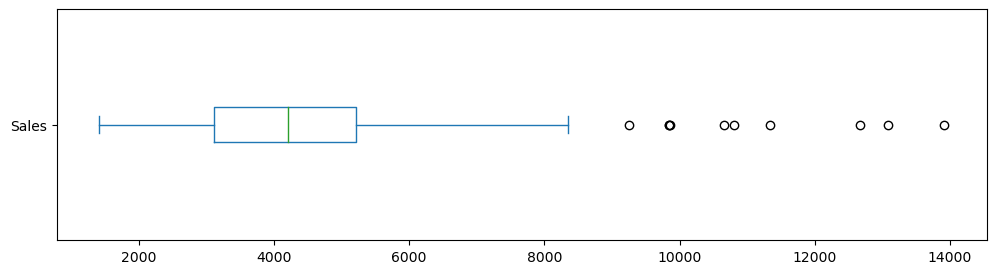

In [10]:
df[label].plot(kind='box', vert=False, figsize=(12, 3));

# Exploratory Data Analysis

## Visualize the Data

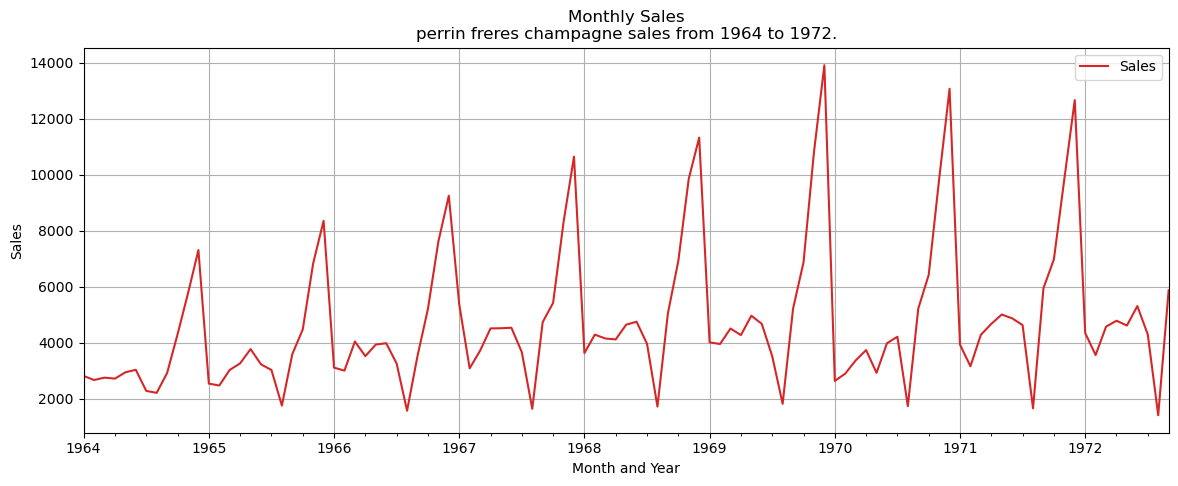

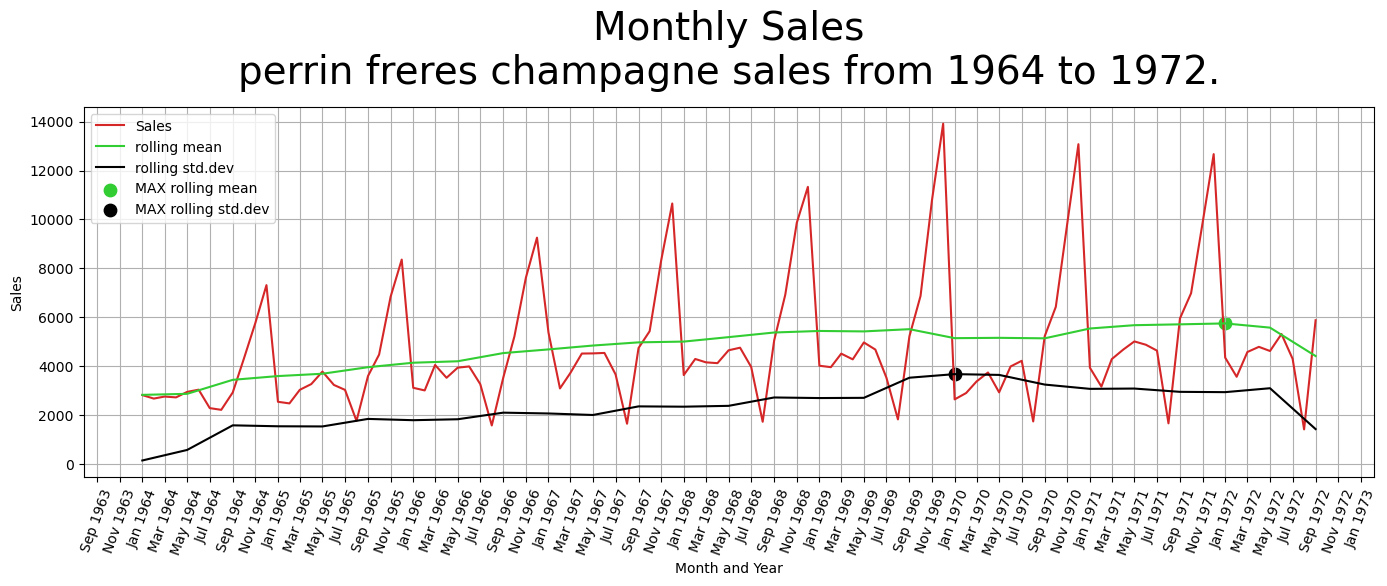

In [11]:
def plot_df(df=None, x=None, y=None, title="", xlabel='Month and Year', ylabel="", dpi=100):
    fig = plt.figure(figsize=(14, 6), dpi=dpi)
    
    sns.lineplot(x=x, y=y, color='tab:red', estimator='mean', errorbar="sd", dashes=False, markers=True, label=y.name)
#     plt.plot(x, y, color='tab:red', label=y.name)
#     sns.relplot(data=df, x=x, y=y, kind="line", height=5, aspect=2.5, color='tab:red', 
#                 estimator='mean', errorbar="sd", dashes=False, markers=True, label=y.name);

    # visualsing data in terms of rolling statistical measures
    roll_mean    = y.rolling(window=12, step=4, min_periods=2, center=True).mean()
    roll_std_dev = y.rolling(window=12, step=4, min_periods=2, center=True).std()
    plt.plot(roll_mean,    color="limegreen", label="rolling mean")
    plt.plot(roll_std_dev, color="k",         label="rolling std.dev")
    plt.scatter(roll_mean.idxmax(), roll_mean.max() , marker='o', s=80, color='limegreen', label='MAX rolling mean')
    plt.scatter(roll_std_dev.idxmax(), roll_std_dev.max(), marker='o',  s=80, color='k', label='MAX rolling std.dev')

    # Set the x-axis tick frequency to each month
    plt.gca().xaxis.set_major_locator(mpl.dates.MonthLocator(interval=2))

    # Set the x-axis label format
    date_fmt = mpl.dates.DateFormatter('%b %Y')
    plt.gca().xaxis.set_major_formatter(date_fmt)

    # Set the title, the x-axis label    
    plt.gca().set(xlabel=xlabel, ylabel=y.name)
    
    # Set the font size of the title
    plt.title(title, y=1.04, fontsize=28)

    # Rotate the x-axis tick labels for better visibility
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.legend()
    plt.grid()
    plt.show()


# df.plot();
df[label].plot(figsize=(14, 5), grid=True, legend=True, color='tab:red',
               xlabel='Month and Year', ylabel=label,
               title='Monthly Sales\nperrin freres champagne sales from 1964 to 1972.');

plot_df(x=df.index, y=df[label], title='Monthly Sales\nperrin freres champagne sales from 1964 to 1972.') 

**Note**:

1. Since all values are positive, you can show this on both sides of the Y axis **(Two Side View)** to emphasize the growth.

2. From the plot, we are seeing that it's kind of a **seasonal data**. It may not be stationary. To clarify the confusion, we can apply here the **'Dickey Fuller Test'** to see whether it is **Stationary or Non-Stationary Time Series**.


Q: How to test for stationarity?

A: You need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called **Unit Root Tests**. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

- **Augmented Dickey Fuller test (ADH Test)**
- Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
- Philips Perron test (PP Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis.

### Two Side View

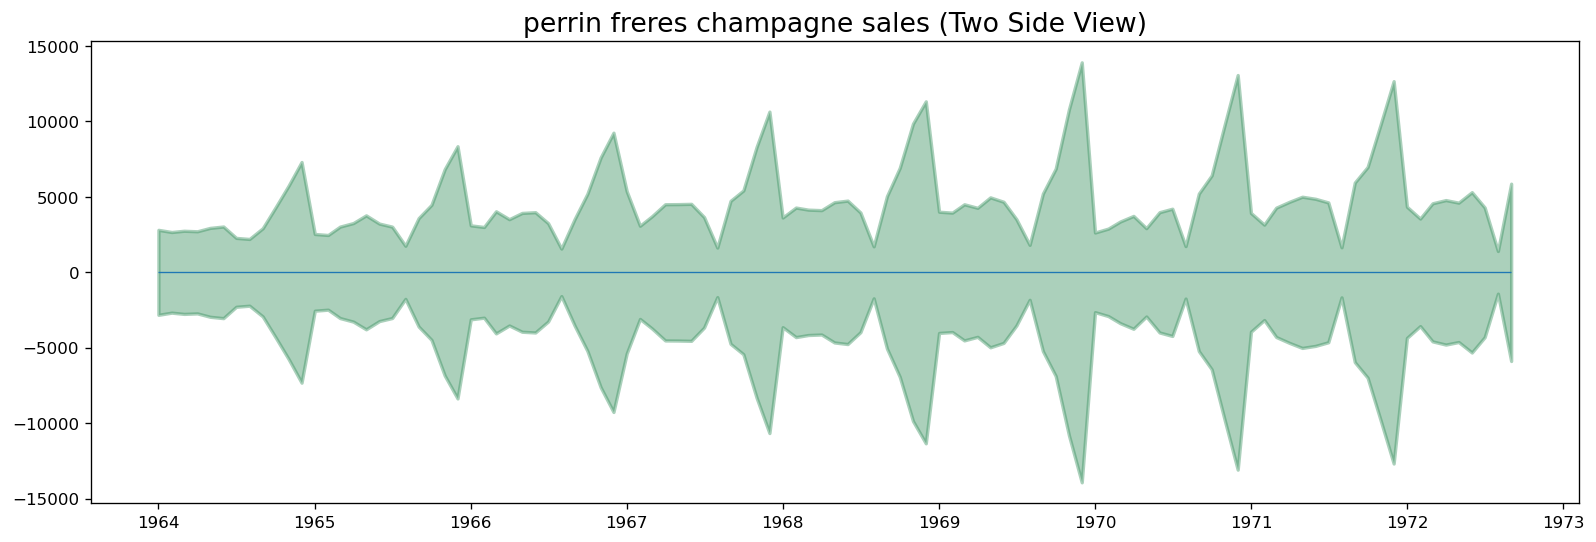

In [12]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(df.index, y1=df[label], y2=-df[label], alpha=0.4, linewidth=2, color='seagreen')
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.8)
plt.title('perrin freres champagne sales (Two Side View)', fontsize=16)
# plt.ylim(-800, 800)
plt.show()

**Note**:

Since its a monthly time series and **follows a certain repetitive pattern every year**, you can **plot each year** as a **separate line** in the same plot. This lets you **compare the year wise patterns side-by-side**.

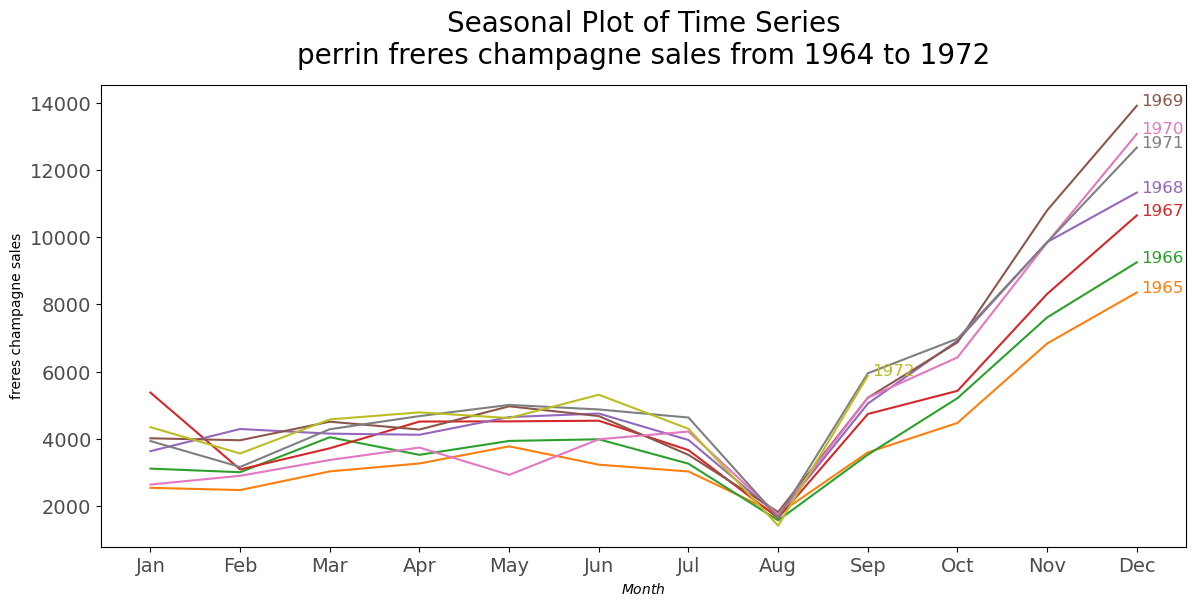

In [13]:
# Prep Colors
np.random.seed(100)
# colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(df.index.year.unique()), replace=False)
colors = [f"C{i}" for i in range(len(df.index.year.unique()))]


# Seasonal Plot Each Year of a Time Series
# https://strftime.org/
plt.figure(figsize=(14,6), dpi= 100)
plt.set_loglevel('WARNING') 
for i, y in enumerate(df.index.year.unique()):
    if i > 0:   
        data = df.loc[df.index.year == y, :]
        plt.plot(data.index.strftime('%b'), data[label], color = colors[i], label = f"{y}")
        plt.text(x = data.shape[0]-.95, y = data[label][-1:].values[0], s = y, 
                 # position=(i*365-y , data[label][-1:].values[0]), 
                 color = colors[i], fontsize = 12)

# Decoration
plt.xticks(fontsize=14, alpha=.7)
plt.yticks(fontsize=14, alpha=.7)
plt.gca().set(xlabel='$Month$', ylabel='freres champagne sales')
plt.title("Seasonal Plot of Time Series\nperrin freres champagne sales from 1964 to 1972", fontsize=20, pad=15)
plt.show()

**Note**:

In a specific line of sales spanning from January to July, there is a noticeable trend. During the **month of July**, Champagne sales experience a significant **decline**, only to **rebound from August to December**. This predictable cycle continues without interruption, **repeating itself year after year**. It is undeniable that this recurring pattern persists consistently in every given year.

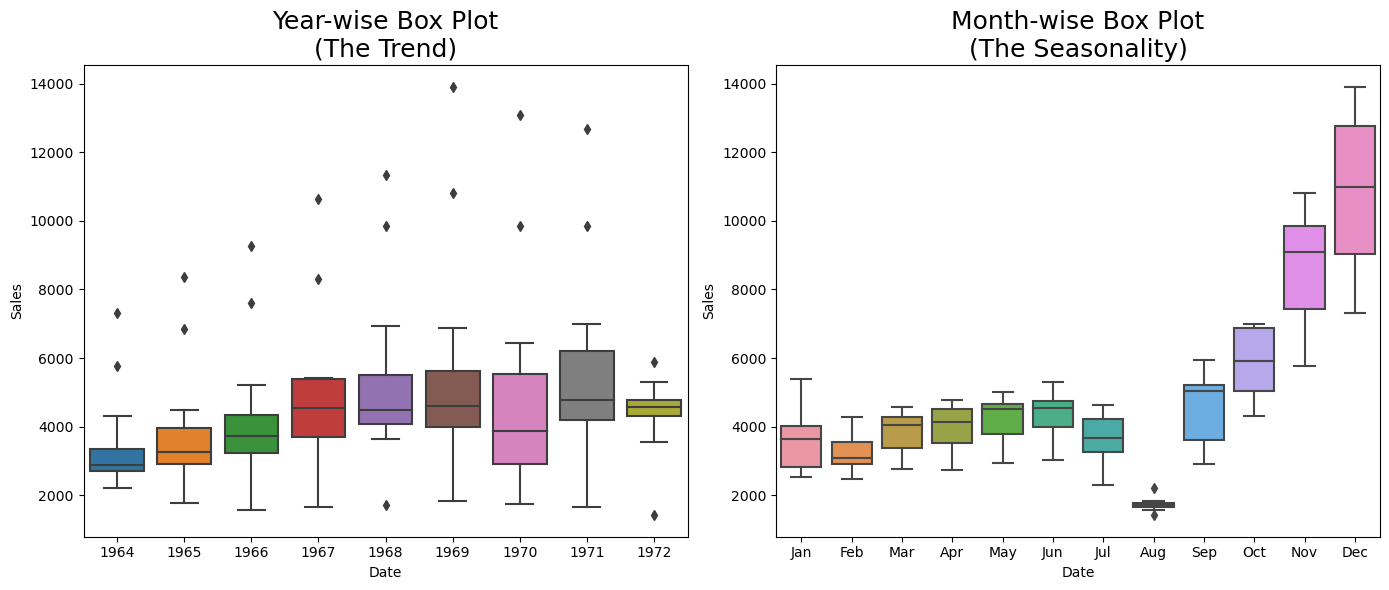

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi= 100)

# Boxplot of Year-wise (trend) Distribution, Draw Plot
sns.boxplot(x=df.index.year, y=label, data=df, ax=axes[0])
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);

# Boxplot of Month-wise (Seasonal) Distribution, Draw Plot
sns.boxplot(x=df.index.strftime('%b'), y=label, data=df, ax=axes[1])
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

plt.tight_layout()
plt.show()

**Note**:

1. Box plots make the distribution of data apparent both on an **annual and monthly basis**. Additionally, within a monthly box plot, it is evident that **November and December** have notably **higher Champagne sales**, which can be attributed to **year-end celebrations**.


Q: Up until now, we have **observed similarities** to identify the pattern. Now, how can **any deviations** from the norm be detected?

A: Indeed, one way to detect deviations from the normal pattern is through the **decomposition of a time series**. By decomposing a time series into its underlying components, such as trend, seasonality, and residual (or error), it becomes easier to identify any anomalous behavior or outliers that deviate from the expected pattern. The decomposition process allows us to analyze and understand the individual components of the time series, enabling us to detect any unusual variations or deviations from the norm.

## Decomposition of a Time Series

A time series may be imagined as a combination of the trend, seasonality and the error terms.

Additive time series:
> Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
> Value = Base Level x Trend x Seasonality x Error

- https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/#:~:text=Time%20series%20decomposition%20involves%20thinking,time%20series%20analysis%20and%20forecasting.

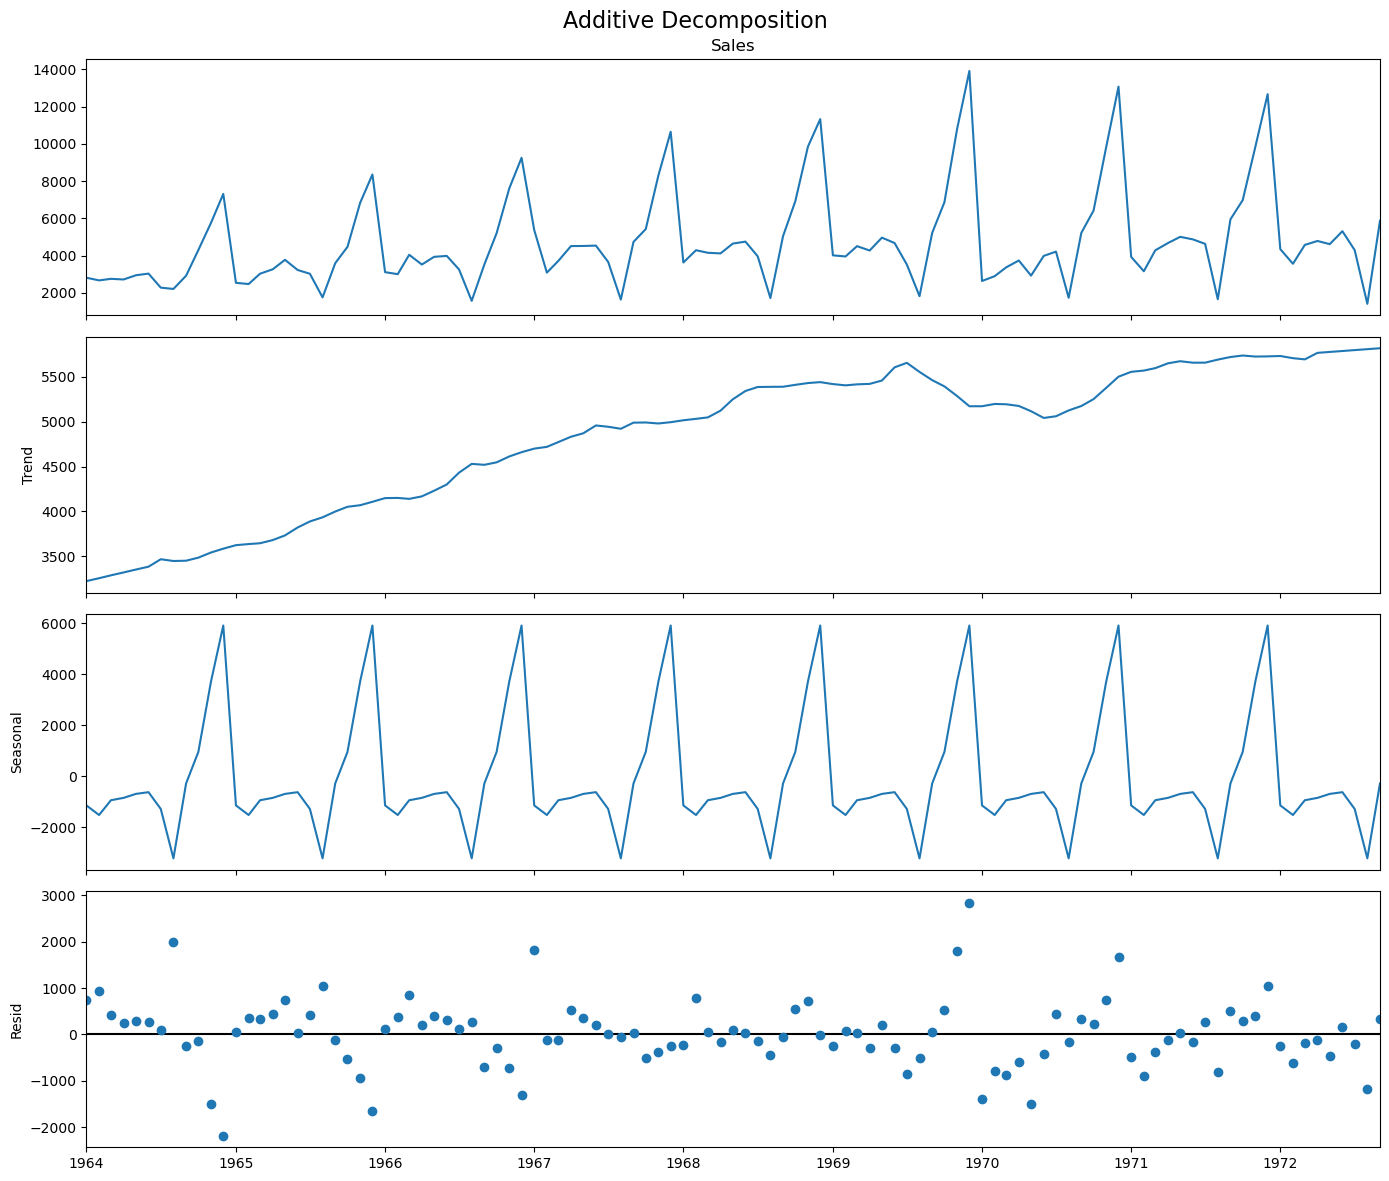

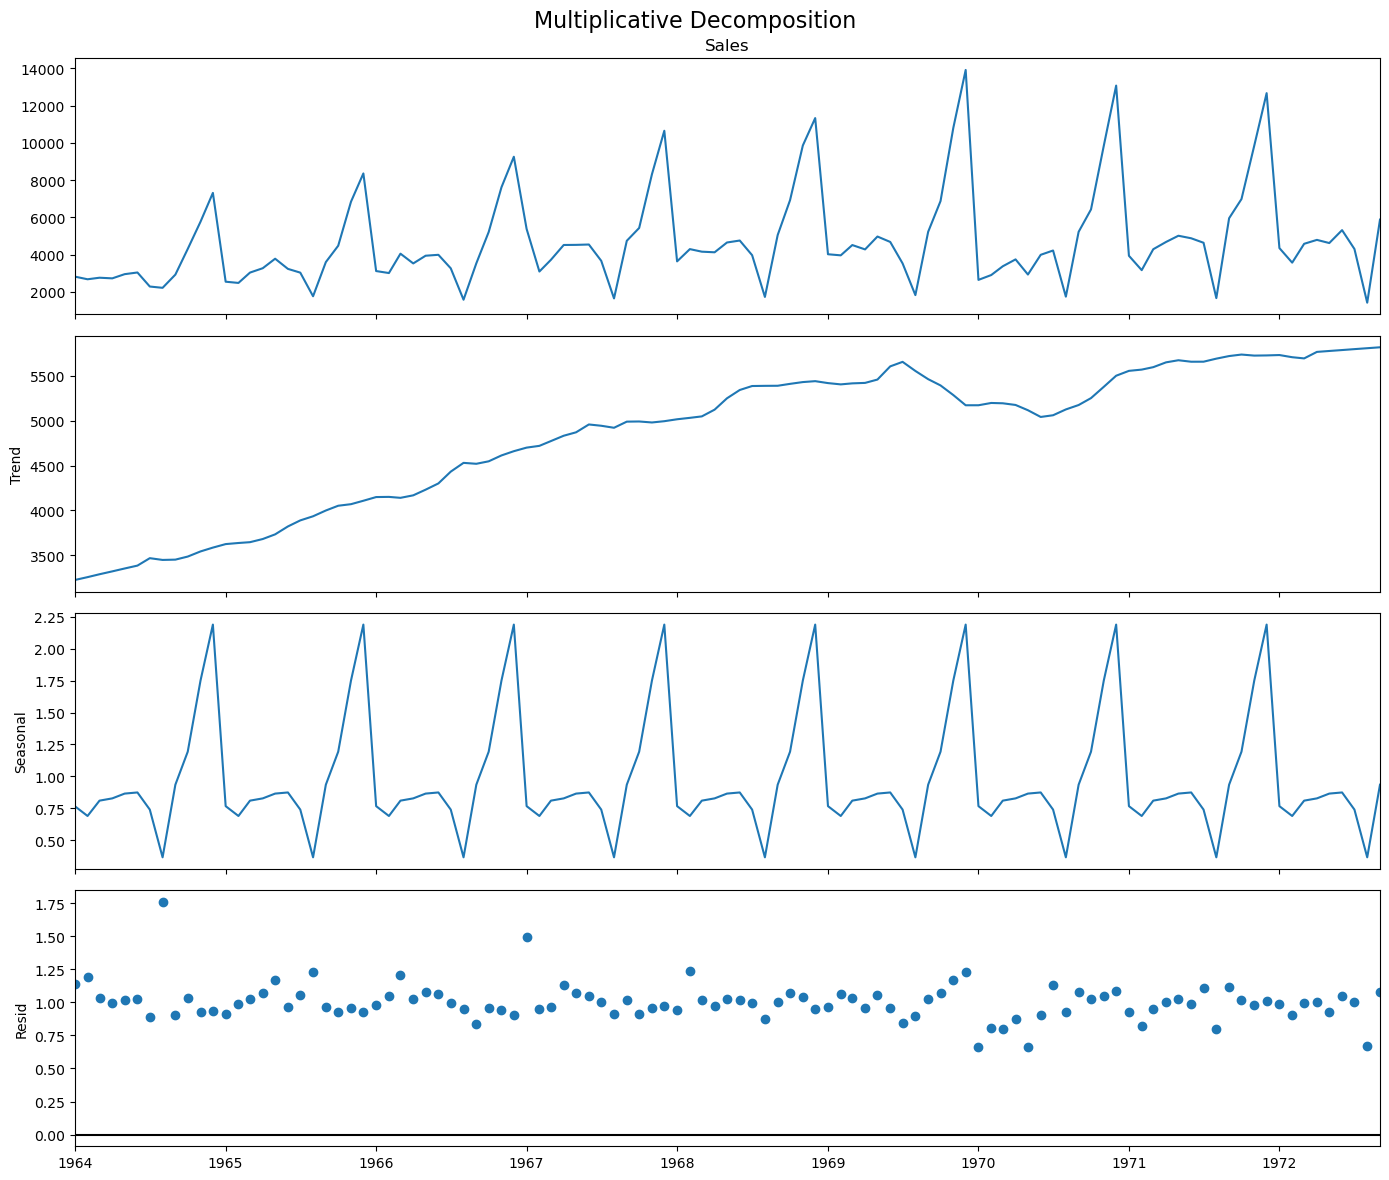

In [15]:
# Setting extrapolate_trend='freq' takes care of any missing values in trend and residuals at the beginning of series.

# Additive Decomposition
additive_decomposition = sm.tsa.seasonal_decompose(df[label], model='additive', 
                                                   period=None, extrapolate_trend='freq')
# Multiplicative Decomposition 
multiplicative_decomposition = sm.tsa.seasonal_decompose(df[label], model='multiplicative', 
                                                         period=None, extrapolate_trend='freq')

# Additive Plot
plt.rcParams.update({'figure.figsize': (14, 12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout()

# Multiplicative Plot
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)

plt.tight_layout()
plt.show()

**Note**:

If you look at the residuals of the **additive decomposition** closely, it has some pattern **left over** and **right over**. The **multiplicative decomposition**, however, looks **quite random** which is **good**. So ideally, multiplicative decomposition should be preferred for this particular series.

In [16]:
# Extract the Components: multiplicative_decomposition
# If you check, the product of seas, trend and resid columns should exactly equal to the actual_values.
# Actual Values = Product of (Seasonal * Trend * Resid)
result_mul = multiplicative_decomposition

df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed

,seas,trend,resid,actual_values
Date,,,,
1964-01-01,0.766088,3223.150010,1.140038,2815.0
1964-02-01,0.688953,3255.293366,1.191397,2672.0
1964-03-01,0.809228,3287.436723,1.035603,2755.0
1964-04-01,0.826961,3319.580080,0.991197,2721.0
1964-05-01,0.864521,3351.723436,1.016691,2946.0
...,...,...,...,...
1972-05-01,0.864521,5777.413801,0.924581,4618.0
1972-06-01,0.873394,5787.696144,1.050854,5312.0
1972-07-01,0.738935,5797.978487,1.003191,4298.0


# Data Preprocessing


## Stationary or Non-Stationary Time Series

### Augmented Dickey Fuller Testing (ADH Test) For Stationarity


**Dickey-Fuller test** is a statistical test used to determine if a time series data is stationary or not. 

**Stationarity** refers to a time series where statistical properties remain constant over time. It means a constant mean, variance, and autocovariance. Stationarity is important in modeling because it simplifies analysis, enables accurate parameter estimation, and facilitates reliable forecasting. 

**Non-stationary** series exhibit changing patterns, making modeling and prediction challenging. By ensuring stationarity, models like ARIMA can be effectively applied, parameter significance can be interpreted, and valid inferences can be drawn.

**The test evaluates** the null hypothesis that the time series has a unit root, indicating non-stationarity. If the test statistic is greater than the critical value, the null hypothesis is rejected, suggesting stationarity. This test is widely used in **econometrics** and **time series analysis** to ensure that data meets the assumptions necessary for accurate modeling and forecasting.

- https://www.simplilearn.com/tutorials/statistics-tutorial/p-value-in-statistics-hypothesis

In [17]:
# Dickey Fuller Testing For Stationarity
# Ho : Data is not Stationary : NULL hypothesies
# H1 : Data is Stationary     : alternate hypothesies

def adfuller_test(target):
    labels  = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    results = sm.tsa.stattools.adfuller(target, autolag='AIC')
    for label, result in zip(labels, results):
        if label == 'p-value':
            print(f'{label:<30}: {result:2.0e}')
            continue            
        print(f'{label:<30}: {result:.2f}')
    for key, value in results[4].items():
        print(f'{"Critical Values":<30}: {key:<5} {value:.3f}')
    if results[1] <= 0.05:
        print('\nStrong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".')
    else:
        print('\nWeak evidence against the NULL hypothesis (Ho), time series has a unit root, indicating it is "non stationary".')

        
# test_result = adfuller(df['Sales'])
adfuller_test(df[label])

ADF Test Statistic            : -1.83
p-value                       : 4e-01
#Lags Used                    : 11.00
Number of Observations Used   : 93.00
Critical Values               : 1%    -3.503
Critical Values               : 5%    -2.893
Critical Values               : 10%   -2.584

Weak evidence against the NULL hypothesis (Ho), time series has a unit root, indicating it is "non stationary".


**Note**:

1. As the P-value 0.4 is grater than 0.05, the Dickey Fuller Test tells us that the data is **Not Stationary**.
Now it's time to *<ins>make the data stationary</ins>*.


Q: How to make a time series stationary?

A: You can make series stationary by:

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above

The most common and convenient method to stationarize the series is by **differencing the series** at least once until it becomes approximately stationary.

### Making the data Stationary by Differencing (Integrated)

As the data is **seasional** and each year consists **12 month**, from the graph we are seeing that the per cycle difference of the data is **12 months**.

That's why we will **shift 12** here and the substraction from the **'Sales'** column will be stored in a new column titled **'seasonal_first_difference'**.

In [18]:
df[label].shift(1)

Date
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Freq: MS, Name: Sales, Length: 105, dtype: float64

In [19]:
# Sales Differencing
df['Sales First Difference']    = df[label] - df[label].shift(1)

# Seasonal Differencing
df['Seasonal First Difference'] = df[label] - df[label].shift(12)

df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Date,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


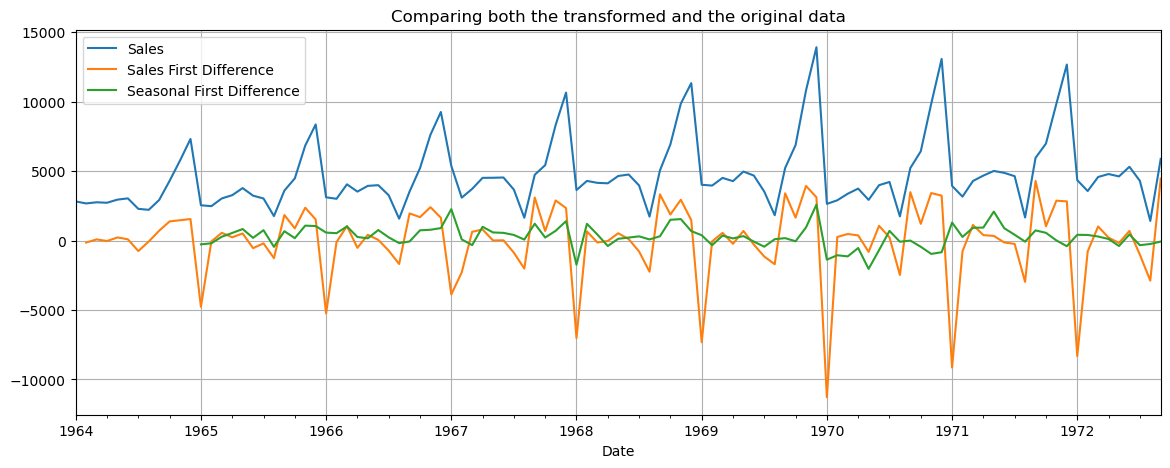

In [20]:
# Comparing both the transformed and the original data
df.plot(figsize=(14, 5), grid=True, legend=True, title="Comparing both the transformed and the original data");

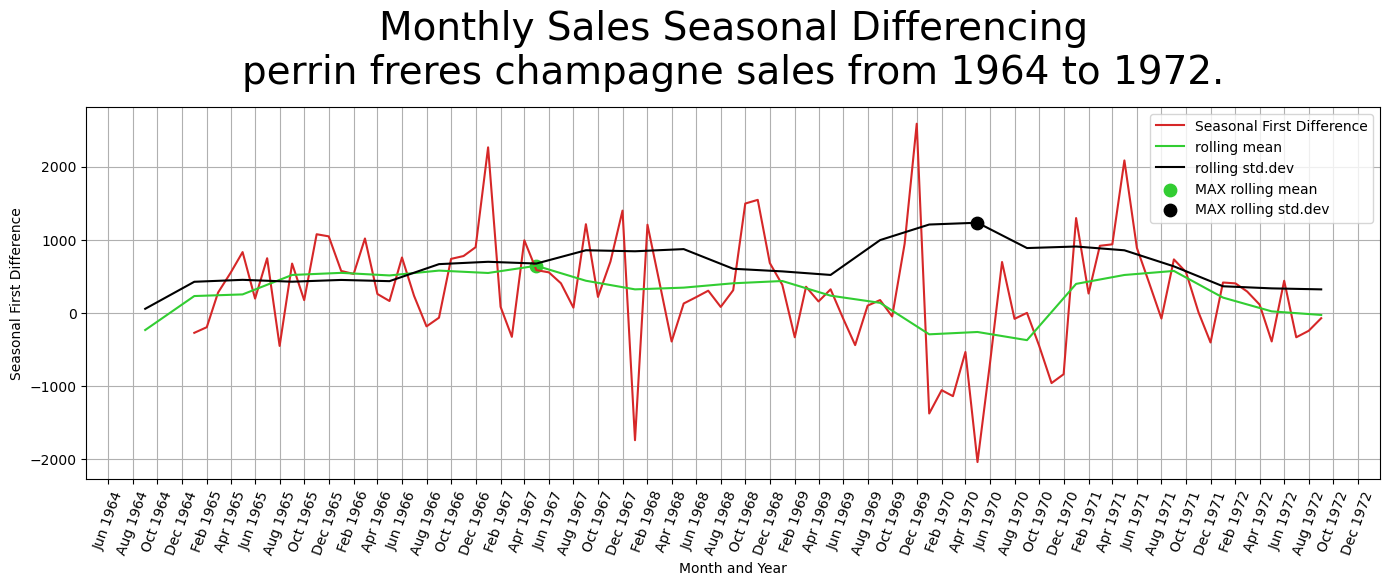

In [21]:
# Plot the Seasonal Differencing
plot_df(df, x=df.index, y=df['Seasonal First Difference'], ylabel='Seasonal First Difference',
        title='Monthly Sales Seasonal Differencing\nperrin freres champagne sales from 1964 to 1972.') 

## Again Applying Dickey Fuller Test

Now, we want to see if our new data became **stationary** or not.
But this time we should pay extra attention to **'dropna()'**. Because for shifting 12, the 1st 12 values of the **'seasional_first_difference'** will be NaN. We have to **keep them aside**.

In [22]:
# Again Dickey Fuller test on Seasonal Differencing
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic            : -7.19
p-value                       : 3e-10
#Lags Used                    : 11.00
Number of Observations Used   : 92.00
Critical Values               : 1%    -3.504
Critical Values               : 5%    -2.894
Critical Values               : 10%   -2.584

Strong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".


In [23]:
# Again Dickey Fuller test on Seasonal Differencing
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic            : -7.63
p-value                       : 2e-11
#Lags Used                    : 0.00
Number of Observations Used   : 92.00
Critical Values               : 1%    -3.504
Critical Values               : 5%    -2.894
Critical Values               : 10%   -2.584

Strong evidence against the NULL hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is "stationary".


**Note**:

Done! As our P-value this time becomes less than 0.05, we can easily tell **_<ins>this data a stationary one</ins>_**.

# AUTO-CORRELATION PLOT ANALYSIS:

- **Look for significant autocorrelation values**: In the `autocorrelation plot`, observe the autocorrelation coefficients. Look for values that fall outside the dashed blue lines, which represent the confidence interval. Correlation values outside this interval are typically considered statistically significant. Significant autocorrelation at a specific lag suggests a relationship or pattern in the data.

- **Identify significant peaks or spikes**: Look for prominent peaks or spikes in the `autocorrelation plot`. These peaks indicate strong correlations at certain lag values. Identify the lags corresponding to these peaks as they may be important for understanding the underlying patterns in the data.

- **Consider the problem and domain knowledge**: Take into account the specific problem you are analyzing and any domain knowledge you have. For example, `if you are analyzing daily stock prices, you may want to look for autocorrelation at lags representing weekly or monthly patterns`. Understanding the context of the data can help guide your choice of lag.

- **Consider expected behavior and seasonality**: Think about the expected behavior of the time series and any known seasonality. If the data exhibits a seasonal pattern, look for significant autocorrelation at multiples of the seasonal period. This can help capture and model the seasonal component of the data.


**By considering these factors and interpreting the autocorrelation plot, you can identify the lag values that exhibit significant autocorrelation. These lag values can then be used for further analysis, modeling, or forecasting of the time series.**

## Auto-Correlation | Partial Auto-Correlation Analysis:

- **PACF** is most suitable for determining the **lag values** for an **Autoregressive (AR) model**.
- **ACF** is most suitable for determining the **lag values** for a **Moving Average (MA) model**.
- The **"shuts off"** behavior, characterized by an **abrupt decrease**, is typically observed in PACF for AR models. In ACF, the decrease is gradual or exponential due to the cumulative effect of previous lags.

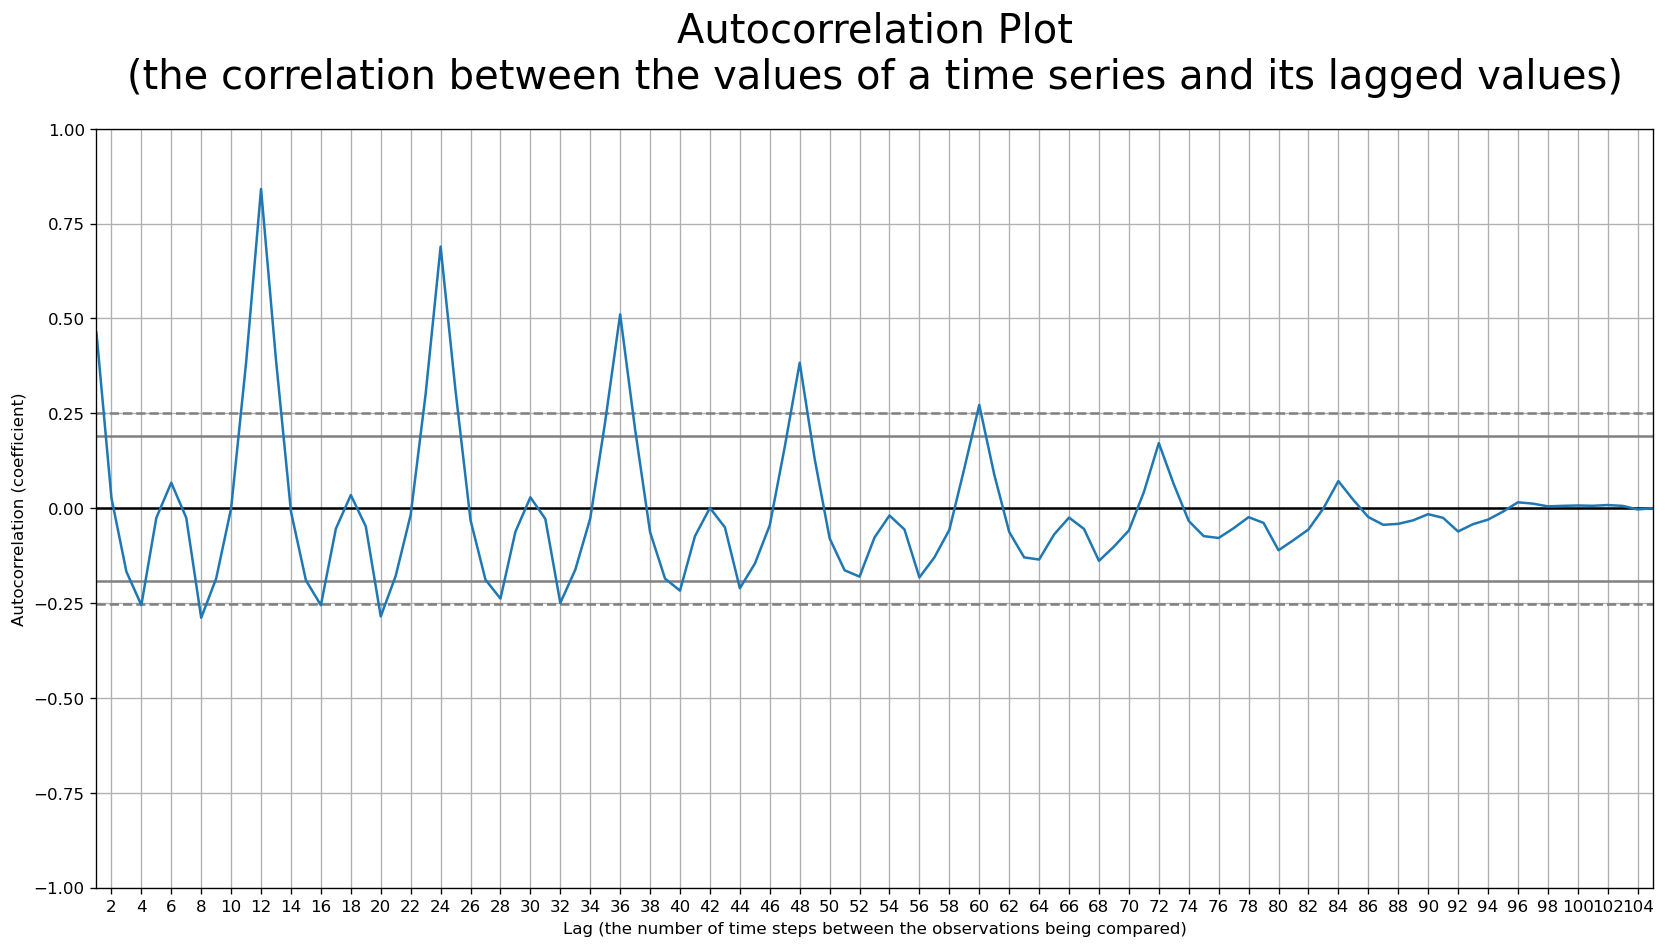

In [24]:
def autocorrelation_df(df=None, x=None, y=None, dpi=120):
    fig = plt.figure(figsize=(14, 8), dpi=dpi)
    
    # Generate autocorrelation plot
    pd.plotting.autocorrelation_plot(y)

    # Adjust the tick locator to show all tick locations
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=plt.gca().get_xlim()[1]//2, integer=True))

    # Add labels and title
    plt.xlabel('Lag (the number of time steps between the observations being compared)')
    plt.ylabel('Autocorrelation (coefficient)')
    
    # Set the font size of the title
    plt.title('Autocorrelation Plot\n(the correlation between the values of a time series and its lagged values)', y=1.04, fontsize=24)

    plt.tight_layout()
    plt.grid(True)
    plt.show()

    
autocorrelation_df(y=df[label])
# autocorrelation_df(y=df['Sales First Difference'].dropna())
# autocorrelation_df(y=df['Seasonal First Difference'].dropna())

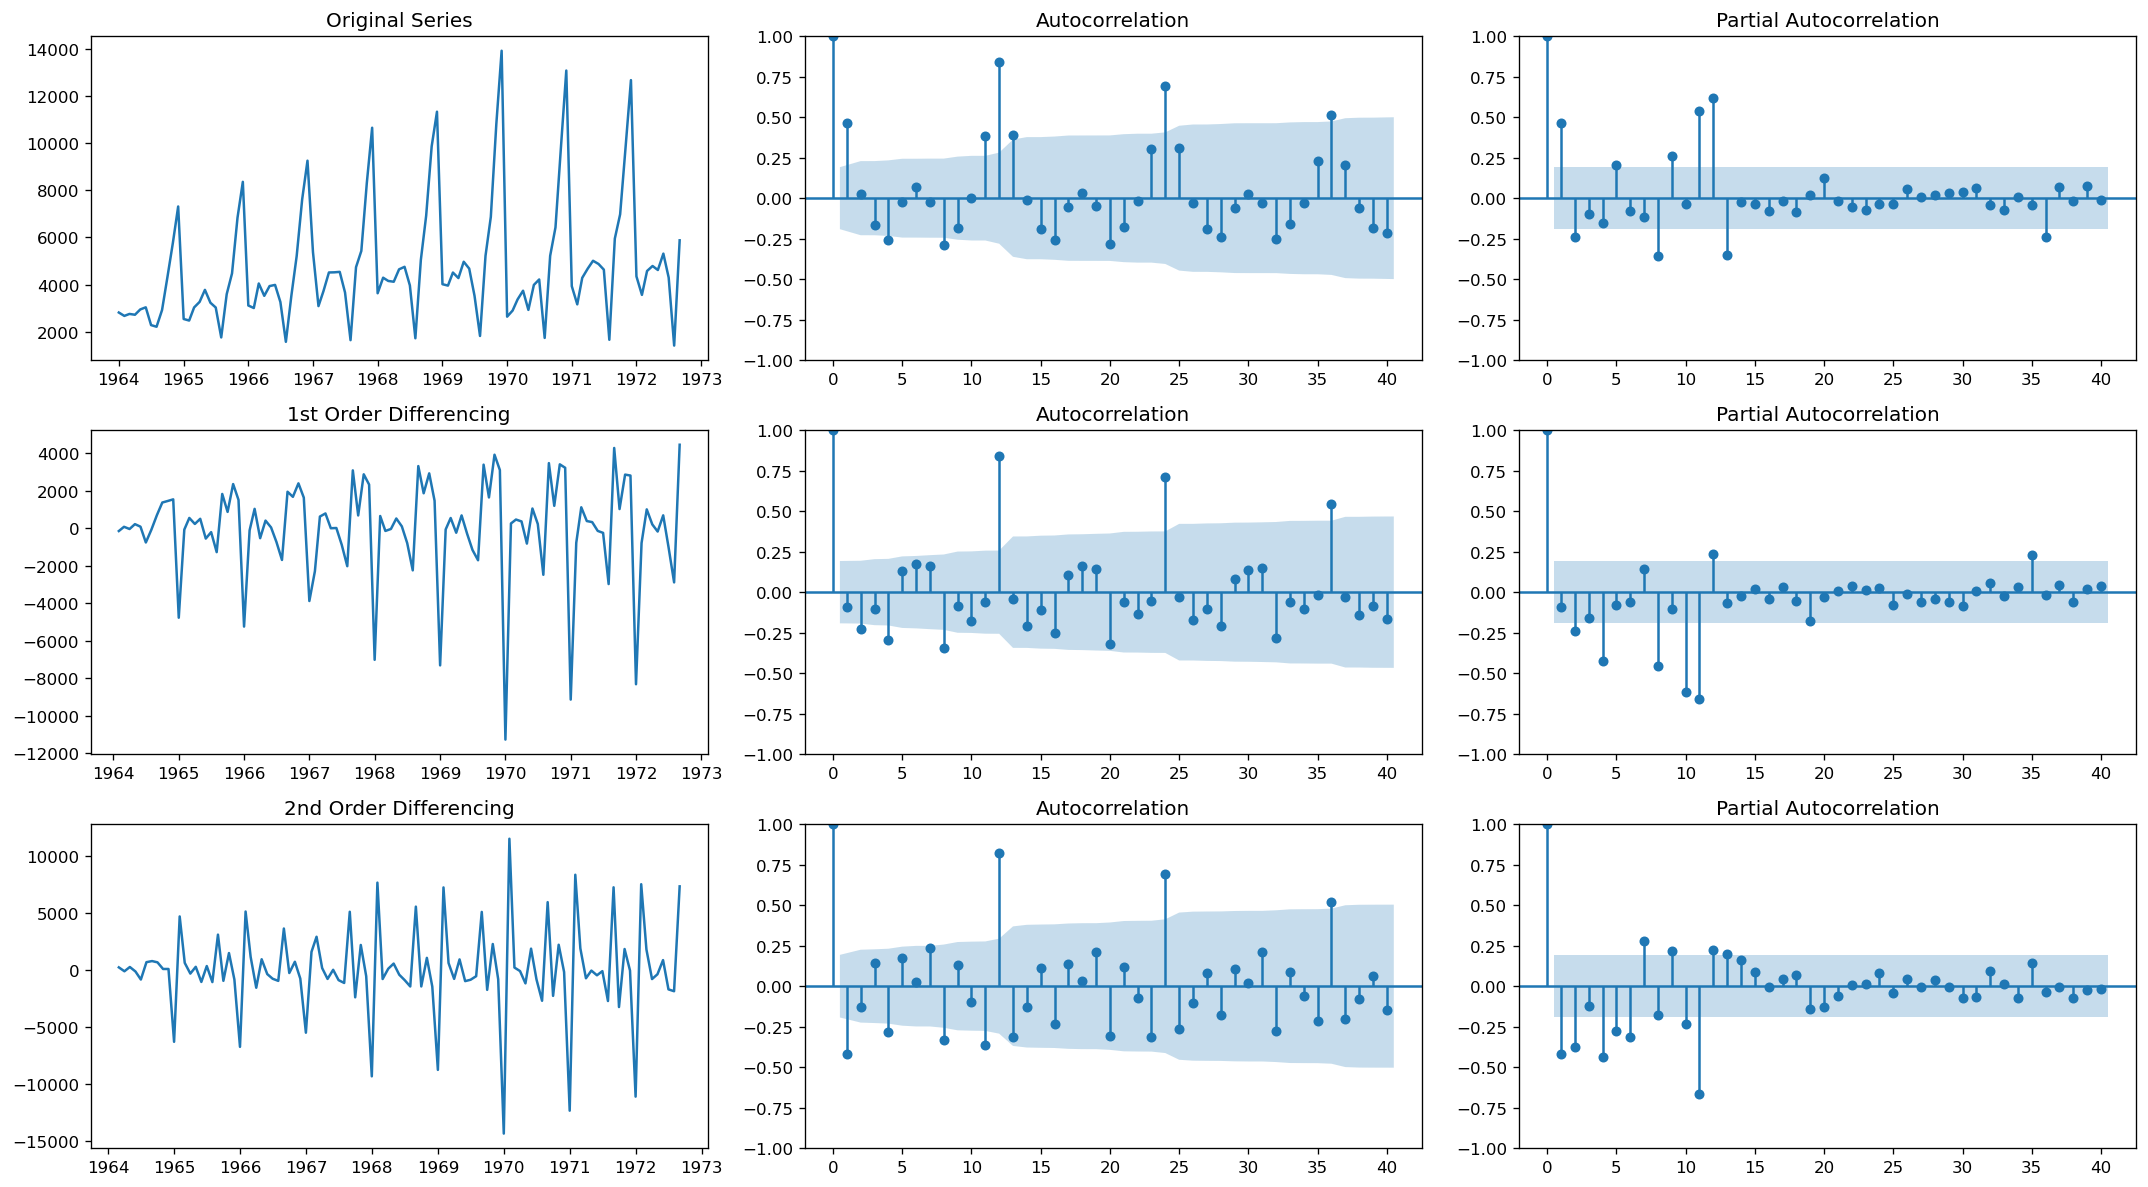

In [25]:
# Original Series
# The acf, pacf at lag 0 (ie., 1) is returned.
fig, axes = plt.subplots(3, 3, figsize=(18, 10), dpi=120)
axes[0, 0].set_title('Original Series')
axes[0, 0].plot(df['Sales']); 
sm.graphics.tsa.plot_acf(df['Sales'], lags=40, ax=axes[0, 1])
sm.graphics.tsa.plot_pacf(df['Sales'], lags=40, method='ywm', ax=axes[0, 2])

# 1st Differencing
axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].plot(df['Sales'].diff()); 
sm.graphics.tsa.plot_acf(df['Sales'].diff().dropna(), lags=40, ax=axes[1, 1])
sm.graphics.tsa.plot_pacf(df['Sales'].diff().dropna(), lags=40, method='ywm', ax=axes[1, 2])

# 12nd Differencing
axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].plot(df['Sales'].diff().diff()); 
sm.graphics.tsa.plot_acf(df['Sales'].diff().diff().dropna(), lags=40, ax=axes[2, 1])
sm.graphics.tsa.plot_pacf(df['Sales'].diff().diff().dropna(), lags=40, method='ywm', ax=axes[2, 2])

plt.tight_layout()
plt.show()

## Detect ARIMA(p,d,q)

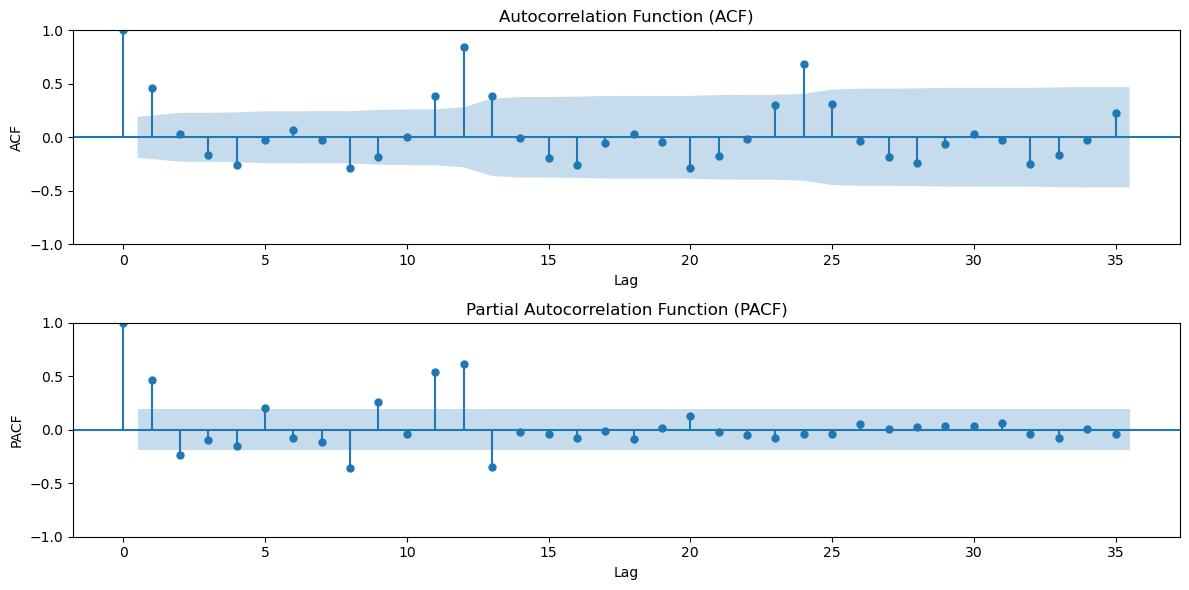

In [26]:
# Step 1: Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

# Plot ACF
# acf  = sm.tsa.stattools.acf(df[label], nlags=None)
# plt.stem(acf)
sm.graphics.tsa.plot_acf(df[label], lags=35, ax=ax1)
ax1.set_xlabel('Lag')
ax1.set_ylabel('ACF')
ax1.set_title('Autocorrelation Function (ACF)')

# Plot PACF
# pacf = sm.tsa.stattools.pacf(df[label], nlags=None)
# plt.stem(pacf)
sm.graphics.tsa.plot_pacf(df[label], lags=35, method='ywm', ax=ax2)
ax2.set_xlabel('Lag')
ax2.set_ylabel('PACF')
ax2.set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()


# Step 2: Identify potential values for 'q' and 'p'
# Look for significant spikes within the confidence interval

In [27]:
# Step 3: Determine the value for 'd'
# Check for stationarity using tests like ADF or visual inspection

# Estimate the number of differences using an Adf Test, KPSS test (defaulth), PP test
test_adf  = pm.arima.utils.ndiffs(df[label], test='adf')
test_kpss = pm.arima.utils.ndiffs(df[label], test='kpss') #  KPSS test (defaulth)
test_pp   = pm.arima.utils.ndiffs(df[label], test='pp')

print('adf:', test_adf, 'kpss:', test_kpss, 'pp:', test_pp)
# Example: If differencing is needed to achieve stationarity
d = 1


# Step 4: Refine parameter values
# Build an ARIMA model and evaluate its performance

# Example: Assume initial values 'p' = 0 and 'q' = 0
p = 0
q = 0

print("\np: {} d: {} q: {}".format(p,d,q))

adf: 0 kpss: 1 pp: 0

p: 0 d: 1 q: 0


# Autoregressive (ARMA) Models

- ARIMA  (p, d, q)(P, D, Q)[s] :   Non-seasonal Autoregressive Integrated Moving Averages
- SARIMA (p, d, q)(P, D, Q)[s] :   Seasonal ARIMA
- SARIMAX(p, d, q)(P, D, Q)[s] :   Seasonal ARIMA with exogenous variables

The parameters of the ARIMA model can be defined as follows:

- p: The lag order of the autoregressive (AR) model, determined by analyzing the partial autocorrelation function (PACF).
- d: The degree of differencing, which determines how many times the raw observations are differenced to achieve stationarity.
- q: The order of the moving average (MA) model, determined by analyzing the autocorrelation function (ACF).

In [28]:
df1 = df.copy()

## TimeSeriesSplit

In [147]:
# from sklearn.model_selection import TimeSeriesSplit
# tss = TimeSeriesSplit(n_splits=2, test_size=24, gap=0).split(y)

# Use if freq warning
# train.index.freq = pd.infer_freq(df.index)
# test.index.freq  = pd.infer_freq(df.index)


from pmdarima.model_selection import train_test_split

# Load/split your data
y          = df1[label]
train, val = pm.model_selection.train_test_split(y, test_size=12)
    
# Perform your desired operations on the train and test sets    
print(train.shape, val.shape)

(93,) (12,)


In [148]:
val

Date
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
1972-09-01     5877.0
Freq: MS, Name: Sales, dtype: float64

## Create the auto_arima Model -> ARIMA(p, d, q)(P, D, Q)[s]

In [149]:
# pmdarima framework automatically hepls you find out the best suited parameters for your model
# Fit your ARIMA(p, d, q)(P, D, Q)[s], 
# The period for seasonal differencing, ``m`` refers to the number of periods in each season.
model = pm.auto_arima(train, m=12, maxiter=100, trace=True, suppress_warnings=True)

# display(model.summary())
print('\nAIC:', model.aic(), '\nBIC:', model.bic(), '\nHQIC:', model.hqic())
print('\nParams:', model.params())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1320.438, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1315.739, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1313.732, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1314.620, Time=0.38 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1325.791, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1315.489, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1314.184, Time=0.41 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1314.673, Time=0.83 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1314.718, Time=0.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1315.563, Time=1.17 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1315.716, Time=0.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1315.762, Time=0.42 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1315.796, Time=0.42 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1313.652, Time=0.48 sec
 ARIMA(0,0,1)(0,1,0

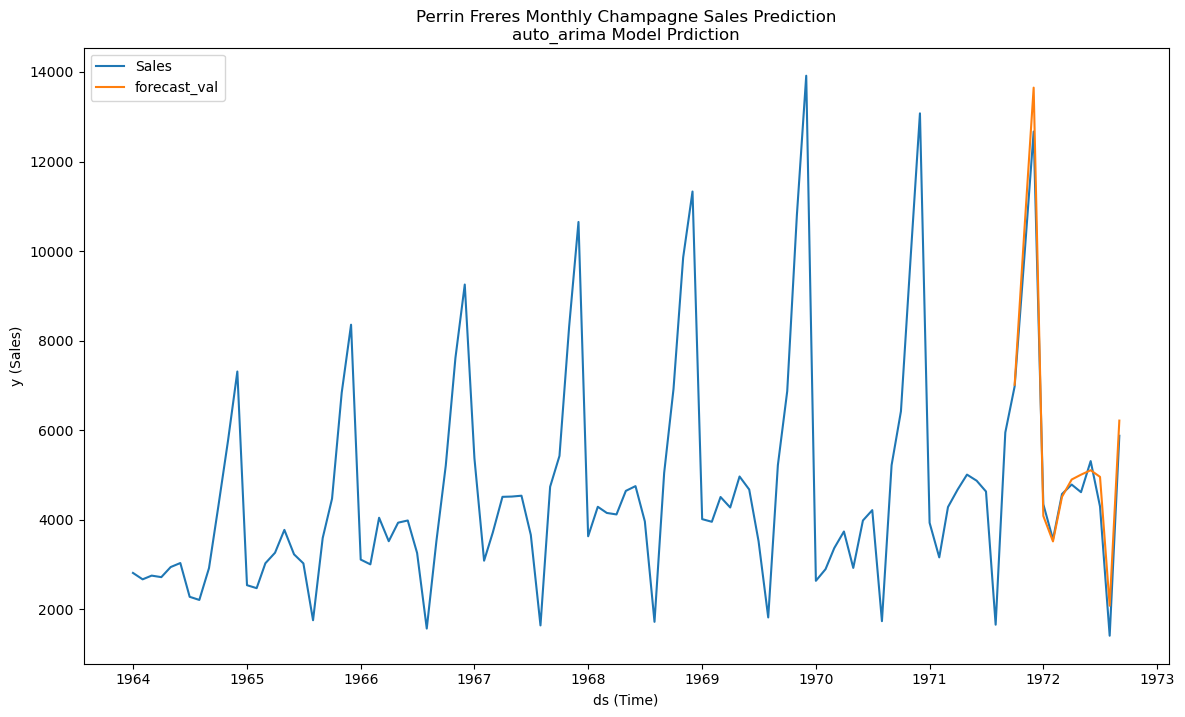

In [152]:
# make your forecasts
forecast_val  = model.predict(n_periods=val.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, orane=forecast_val)
plt.figure(figsize=(14, 8))
plt.plot(y.index, y, label='Sales')
plt.plot(val.index, forecast_val, label='forecast_val')

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nauto_arima Model Prdiction')
plt.legend()
plt.show()

## Residuals Analysis

### The Durbin-Watson statistic on the residuals


The Durbin-Watson statistic is a measure used in time series analysis and regression analysis to detect the presence of autocorrelation, which is the correlation between observations at different time points. **Autocorrelation**: violates one of the assumptions of ordinary least squares (OLS) **regression, which assumes that the errors (residuals) are independent**.

The Durbin-Watson statistic is defined as:

`DW = \frac{\sum_{t=2}^{T}(e_t - e_{t-1})^2}{\sum_{t=1}^{T}e_t^2}`

where e_t represents the residuals or errors of the regression model.

**The Durbin-Watson statistic provides a test for the presence of autocorrelation in the residuals**. It compares the sum of squared differences between consecutive residuals to the sum of squared residuals. The resulting value of DW helps to determine the degree of positive or negative autocorrelation.

The interpretation of the Durbin-Watson statistic depends on its value:

- DW = 2: No autocorrelation is present in the residuals.
- DW < 2: Positive autocorrelation is likely present, indicating that consecutive residuals are positively correlated.
- DW > 2: Negative autocorrelation is likely present, indicating that consecutive residuals are negatively correlated.
- DW close to 0 or 4: Strong autocorrelation is present.

The Durbin-Watson test is commonly used in econometrics and time series analysis to check for autocorrelation in the residuals of a model. **If autocorrelation is detected, it indicates that the model's assumptions are violated, and additional techniques or modifications may be required to address the issue.**

If the Durbin-Watson statistic falls within the acceptable range (e.g., between 1.5 and 2.5), it suggests that there is no significant autocorrelation. If the Durbin-Watson statistic is lower than the lower critical value, it indicates positive autocorrelation, and if it is higher than the upper critical value, it suggests negative autocorrelation.

In [153]:
# Does our model obey the theory?
sm.stats.durbin_watson(model.resid())

0.8562924585938826

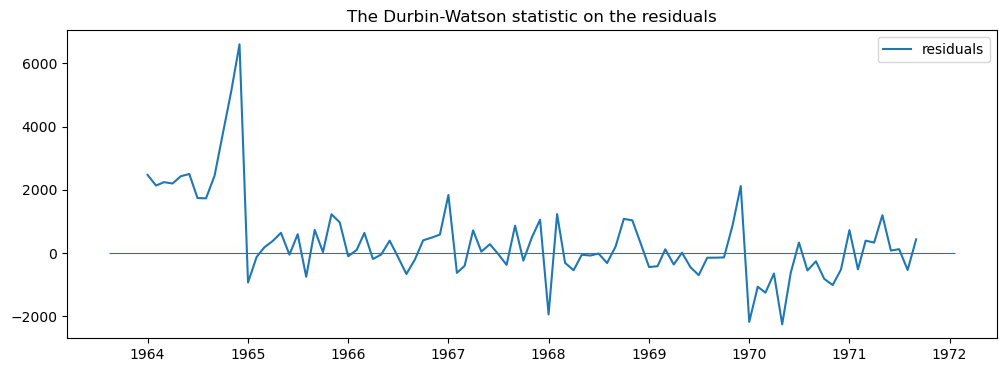

In [161]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(111)
ax = plt.plot(model.resid())

# Get the current x-axis limits
# xmin, xmax = np.min(model.resid()), np.max(model.resid())
xmin, xmax = plt.gca().get_xlim()
plt.hlines(y=0, xmin=xmin, xmax=xmax, linewidth=.8)
plt.title('The Durbin-Watson statistic on the residuals')
plt.legend(['residuals']);

### The normality test on the residuals

When applying the normaltest to the residuals of a time series model, we are checking if the residuals deviate significantly from a normal distribution. If the normaltest indicates that the residuals are not normally distributed, it suggests that the model may need further refinement or that alternative modeling techniques should be considered.

In time series analysis, the normality assumption is often made for the residuals or errors of a model. The residuals are the differences between the observed values and the predicted values from the model. The normality assumption implies that the residuals follow a normal distribution, which is a common assumption in many statistical methods.

The normality of residuals is important because it affects the validity of statistical tests and the reliability of the model's inference. If the residuals are not normally distributed, it can indicate that the model is not adequately capturing the underlying patterns in the data, or that there are other factors influencing the observations that are not accounted for in the model.

The normaltest is a statistical test that can be used to assess the normality of a distribution. It is based on the skewness and kurtosis of the data, which are measures of the asymmetry and peakedness of the distribution, respectively. **The normaltest evaluates the null hypothesis that the distribution is normal. If the p-value of the normaltest is below a certain threshold (e.g., 0.05), we reject the null hypothesis and conclude that the distribution is not normal.**

In [162]:
# The normality test
# Ho : Data distribution is normal     : NULL hypothesies
# H1 : Data distribution is not normal : alternate hypothesies

stats.normaltest(model.resid())

NormaltestResult(statistic=48.71180718046186, pvalue=2.6446333421712528e-11)

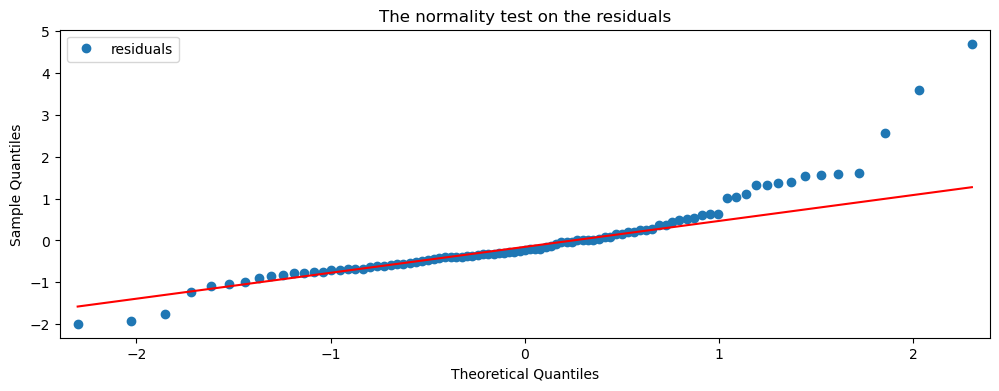

In [163]:
fig = plt.figure(figsize=(12,4))
ax  = fig.add_subplot(111)
fig = sm.qqplot(model.resid(), line='q', ax=ax, fit=True)
plt.title('The normality test on the residuals')
plt.legend(['residuals']);

### The autocorrelation function (ACF) analysis on the residuals

The autocorrelation function (ACF) analysis on the residuals of a time series model is performed to assess the presence of any remaining patterns or correlations in the model's residuals. **Residuals are the differences between the observed values and the predicted values obtained from the time series model.**

The ACF is a statistical tool used to measure the **linear relationship between a time series and its lagged values**. By examining the ACF plot of the residuals, we can identify any significant correlations or patterns that may suggest the presence of omitted information or inadequacies in the model.

Here are a few reasons why analyzing the ACF of residuals is important:

- **Model adequacy**: A time series model is considered adequate when the residuals exhibit no significant autocorrelation. If the ACF plot shows significant correlations at certain lags, it indicates that the model has failed to capture all the underlying patterns or dependencies in the data.

- **Misspecification detection**: The ACF plot can help identify potential misspecifications in the model. For example, if the ACF plot shows significant positive autocorrelations at lag-1 and lag-2, it suggests that the model might be missing some information captured by the lagged values.

- **Residual diagnostics**: The ACF analysis is an essential part of residual diagnostics. It helps to ensure that the residuals satisfy the assumptions of the time series model, such as independence and homoscedasticity. Any significant autocorrelation patterns in the residuals could indicate violations of these assumptions.

- **Model improvement**: Analyzing the ACF of residuals can provide insights for improving the existing time series model. If the ACF plot shows significant autocorrelations, it suggests that including additional lagged terms or refining the model structure might be necessary to capture the remaining dependencies in the data.

In summary, examining the ACF plot of residuals allows us to assess the adequacy of the time series model, detect misspecifications, perform residual diagnostics, and guide model improvement. **It helps to ensure that the model captures all the relevant information and provides reliable forecasts or analyses.**

In [164]:
# results of the autocorrelation function (ACF) analysis on the residuals of a time series model
r,q,p = sm.tsa.acf(model.resid(), fft=True, qstat=True)
data  = np.c_[r[1:], q, p]
index = pd.Index(range(1, q.shape[0]+1), name="lag")
table = pd.DataFrame(data, columns=["AC", "Q", "Prob(>Q)"], index=index)
print(table)

           AC          Q      Prob(>Q)
lag                                   
1    0.522117  26.179046  3.111809e-07
2    0.395325  41.352151  1.048321e-09
3    0.318788  51.328410  4.164118e-11
4    0.277259  58.959530  4.798576e-12
5    0.287209  67.241220  3.839327e-13
6    0.281171  75.269615  3.377763e-14
7    0.285431  83.639348  2.488433e-15
8    0.204845  88.000894  1.183043e-15
9    0.191928  91.875300  6.840575e-16
10   0.161422  94.648950  6.380354e-16
11   0.149724  97.064288  6.797246e-16
12   0.050267  97.339890  1.845140e-15
13   0.129637  99.195869  2.374640e-15
14   0.037743  99.355185  6.302751e-15
15   0.035092  99.494669  1.626506e-14
16   0.011905  99.510931  4.277630e-14
17   0.026763  99.594198  1.057792e-13
18   0.050318  99.892458  2.317776e-13
19  -0.002471  99.893187  5.599434e-13


## Create the ARIMA(p,d,q) Model

- https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_arma_0.html

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -844.729
Date:                Wed, 21 Jun 2023   AIC                           1695.458
Time:                        21:10:22   BIC                           1703.056
Sample:                    01-01-1964   HQIC                          1698.526
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4643.7393    401.564     11.564      0.000    3856.687    5430.791
ma.L1          0.6190      0.079      7.863      0.000       0.465       0.773
sigma2      4.515e+06   6.28e+05      7.192      0.0

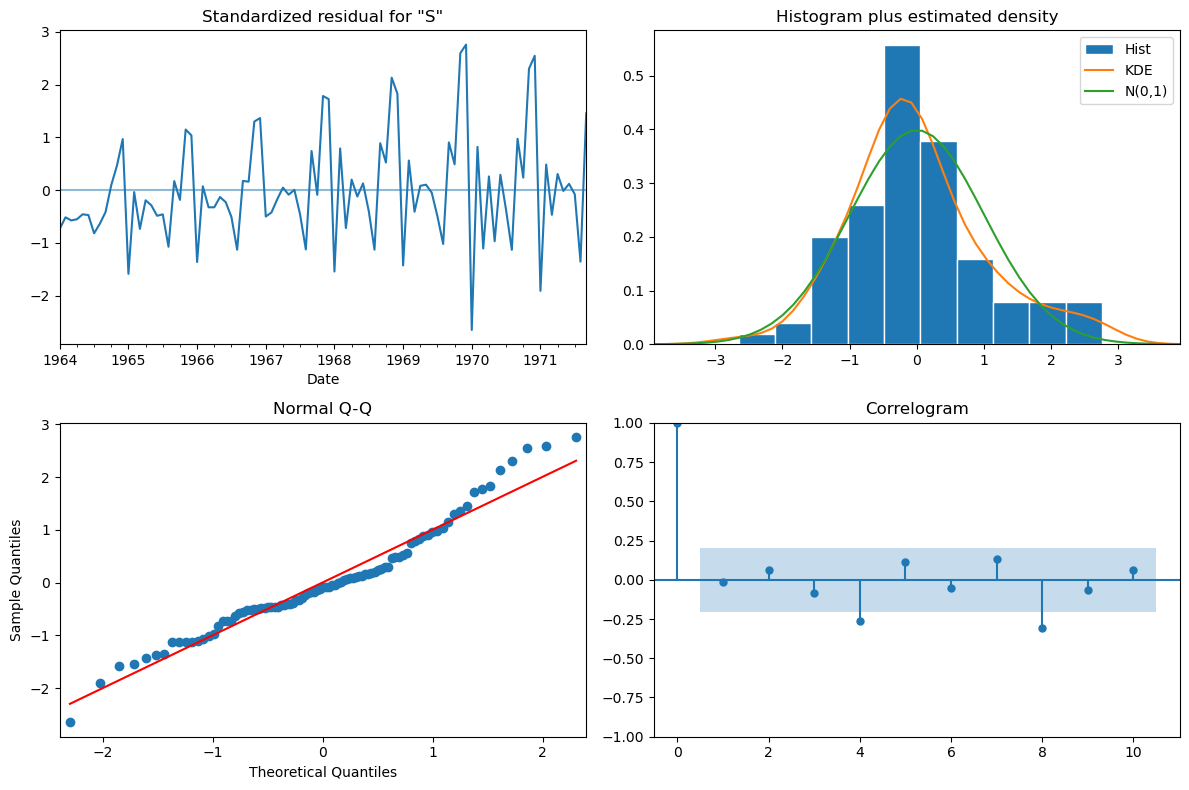

In [165]:
# Create the ARIMA(p,d,q) Model, Fit the model
model = sm.tsa.arima.ARIMA(endog = train,
                           exog  = None,
                           order = (0,0,1),             # order = (p, d, q)
#                            seasonal_order=(1,1,0,12),   # seasonal_order = (p, d, q, shift)
                          ).fit(method_kwargs={'maxiter':1000})
# Evaluate the model
print(model.summary())
# model.mle_retvals

# Examine diagnostic plots
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [166]:
# Save the model permanently and check
with open('model/model_arima.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('model/model_arima.pkl', 'rb') as f:
    model = pickle.load(f)

ARIMA Model Train Data RMSE: 2127.968
ARIMA Model Val Data RMSE  : 2965.358


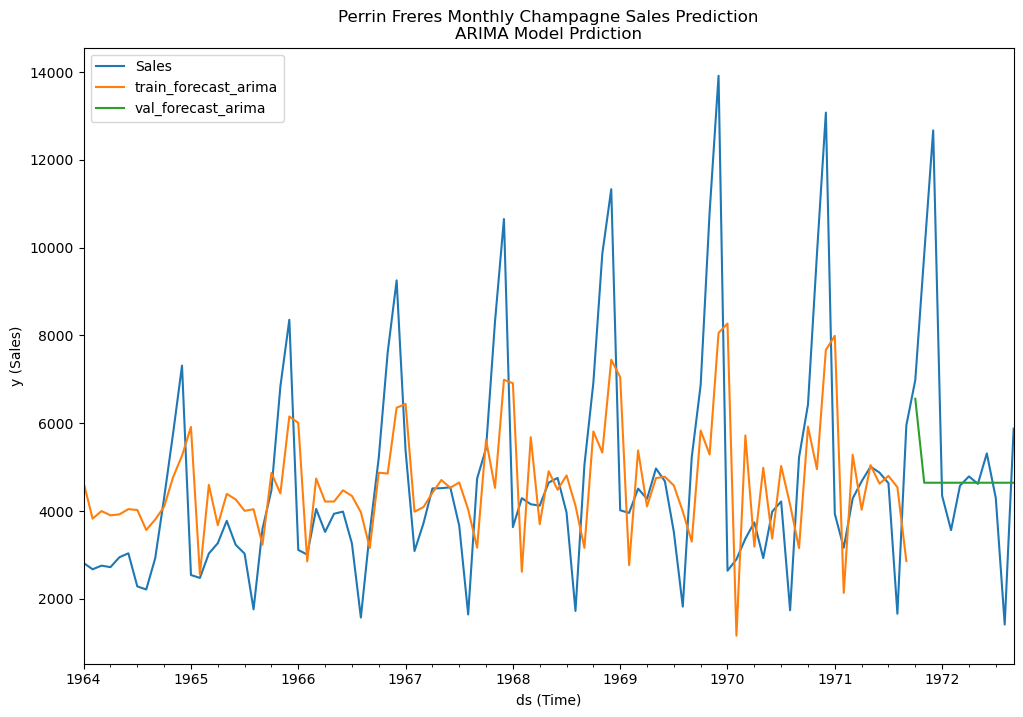

In [167]:
# Plotting the Model and Prediction Test Data
from sklearn.metrics import mean_squared_error

# Make Predictions, start and end are the index range to be predicted
df                         = y.to_frame() # pd.concat([train, val]).to_frame()
df['train_forecast_arima'] = model.predict(start=train.index[0], end=train.index[-1])
df['val_forecast_arima']   = model.predict(start=val.index[0],  end=val.index[-1])

# Plot
df[['Sales', 'train_forecast_arima', 'val_forecast_arima']].plot(figsize=(12, 8));

y_train_pred = df['train_forecast_arima'].dropna().values
y_val_pred   = df['val_forecast_arima'].dropna().values

print(f'ARIMA Model Train Data RMSE: {mean_squared_error(train, y_train_pred, squared=False):.3f}')
print(f'ARIMA Model Val Data RMSE  : {mean_squared_error(val,  y_val_pred,  squared=False):.3f}')

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nARIMA Model Prdiction')
plt.show()

## SARIMAX Model

- https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_sarimax_stata.html
- https://www.statsmodels.org/stable/endog_exog.html

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08739D+00    |proj g|=  6.91294D-02

At iterate    1    f=  7.08545D+00    |proj g|=  1.28511D-02

At iterate    2    f=  7.08532D+00    |proj g|=  6.80775D-03

At iterate    3    f=  7.08528D+00    |proj g|=  1.24434D-03

At iterate    4    f=  7.08528D+00    |proj g|=  7.84231D-05

At iterate    5    f=  7.08528D+00    |proj g|=  1.42430D-04

At iterate    6    f=  7.08528D+00    |proj g|=  6.15384D-04

At iterate    7    f=  7.08528D+00    |proj g|=  1.44420D-03

At iterate    8    f=  7.08527D+00    |proj g|=  2.73908D-03

At iterate    9    f=  7.08526D+00    |proj g|=  4.83392D-03

At iterate   10    f=  7.08523D+00    |proj g|=  8.10864D-03

At iterate   11    f=  7.08516D+00    |proj g|=  1.30213D-02

At iterate   12    f=  7.08499D+00    |proj g|=  1.94788D-02

At iterate   13    f=  7.0

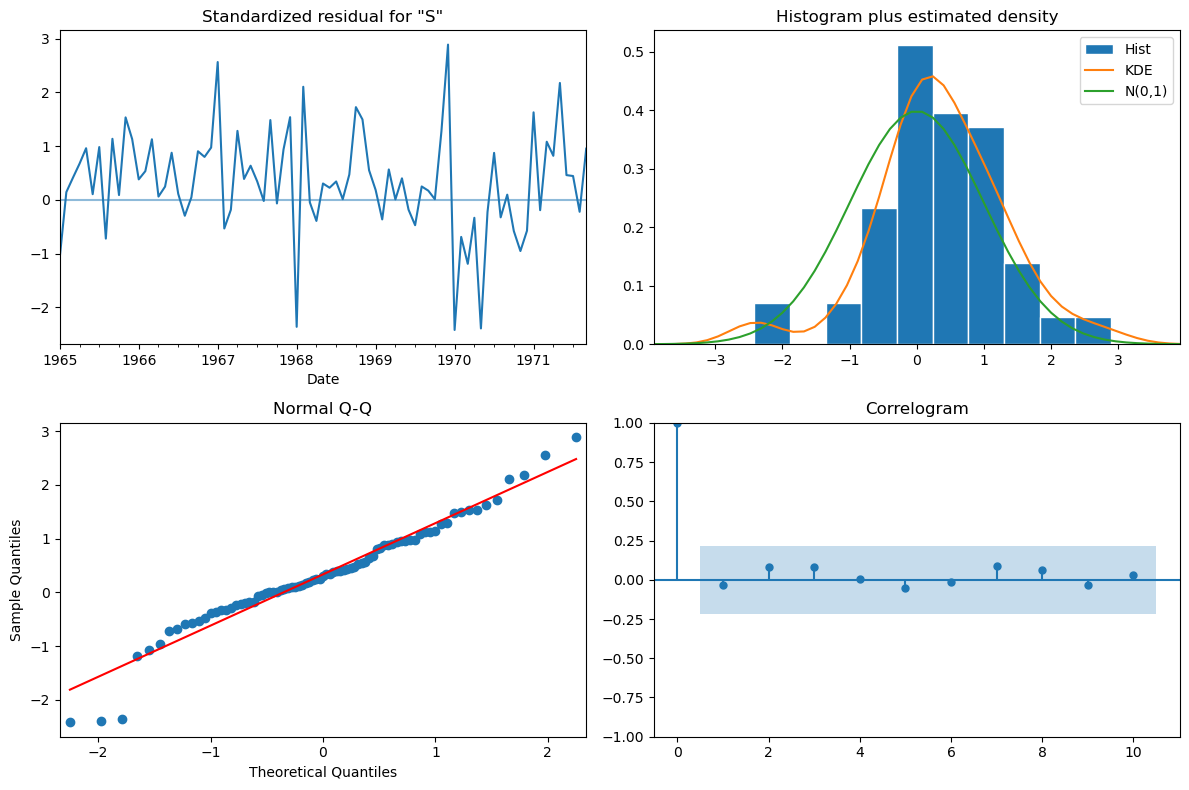

In [168]:
# The endogenous variable represents the target variable you want to forecast
# The exogenous variables are additional variables that may influence the target variable 
# and can improve the forecasting accuracy.
model = sm.tsa.statespace.SARIMAX(endog = train,
                                  exog  = None,
                                  order = (0,0,1),             # order = (p, d, q)
                                  seasonal_order=(1,1,0,12),   # seasonal_order = (p, d, q, shift)
                                  )
model = model.fit(disp=True, maxiter=1000)
# Evaluate the model
print(model.summary())
# model.mle_retvals

# Examine diagnostic plots
model.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [169]:
# Save the model permanently and check
with open('model/model_sarimax.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model
with open('model/model_sarimax.pkl', 'rb') as f:
    model_sarimax = pickle.load(f)

SARIMAX Model Train Data RMSE: 1473.267
SARIMAX Model Val Data RMSE  : 337.567


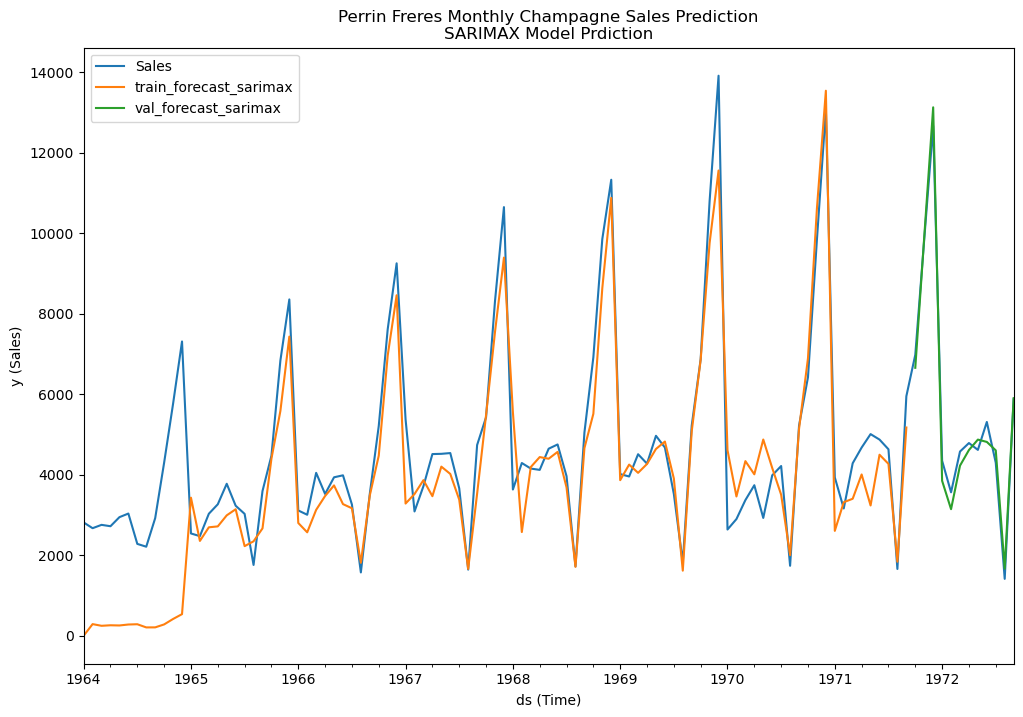

In [170]:
# Plotting the Model and Prediction Test Data
from sklearn.metrics import mean_squared_error

# Make Predictions, start and end are the index range to be predicted
df                           = y.to_frame()
df['train_forecast_sarimax'] = model.predict(start=train.index[0], end=train.index[-1])
df['val_forecast_sarimax']   = model.predict(start=val.index[0],  end=val.index[-1])

# Plot
df[['Sales', 'train_forecast_sarimax', 'val_forecast_sarimax']].plot(figsize=(12, 8));

y_train_pred = df['train_forecast_sarimax'].dropna().values
y_val_pred   = df['val_forecast_sarimax'].dropna().values

print(f'SARIMAX Model Train Data RMSE: {mean_squared_error(train, y_train_pred, squared=False):.3f}')
print(f'SARIMAX Model Val Data RMSE  : {mean_squared_error(val,  y_val_pred,  squared=False):.3f}')

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nSARIMAX Model Prdiction')
plt.show()

**Note**:

- Here the **BLUE** line is **ACTUAL DATA**, **ORANGE and GREEN** line is **PREDICTED DATA**. How good it gave us the results.

## Predict For Future Dataset:

In [171]:
# Determine the START and END dates, then Generate the new index
future_dates = test = pd.date_range(start = y.index[-1] + pd.DateOffset(months=1), 
                                    end   = y.index[-1] + pd.DateOffset(years=10, months=3), 
                                    freq  = 'MS')

# Combine the existing and new index
test = pd.DataFrame(index=future_dates, columns=['future_dates'])
test

,future_dates
1972-10-01,NaN
1972-11-01,NaN
1972-12-01,NaN
1973-01-01,NaN
1973-02-01,NaN
...,...
1982-08-01,NaN
1982-09-01,NaN
1982-10-01,NaN
1982-11-01,NaN


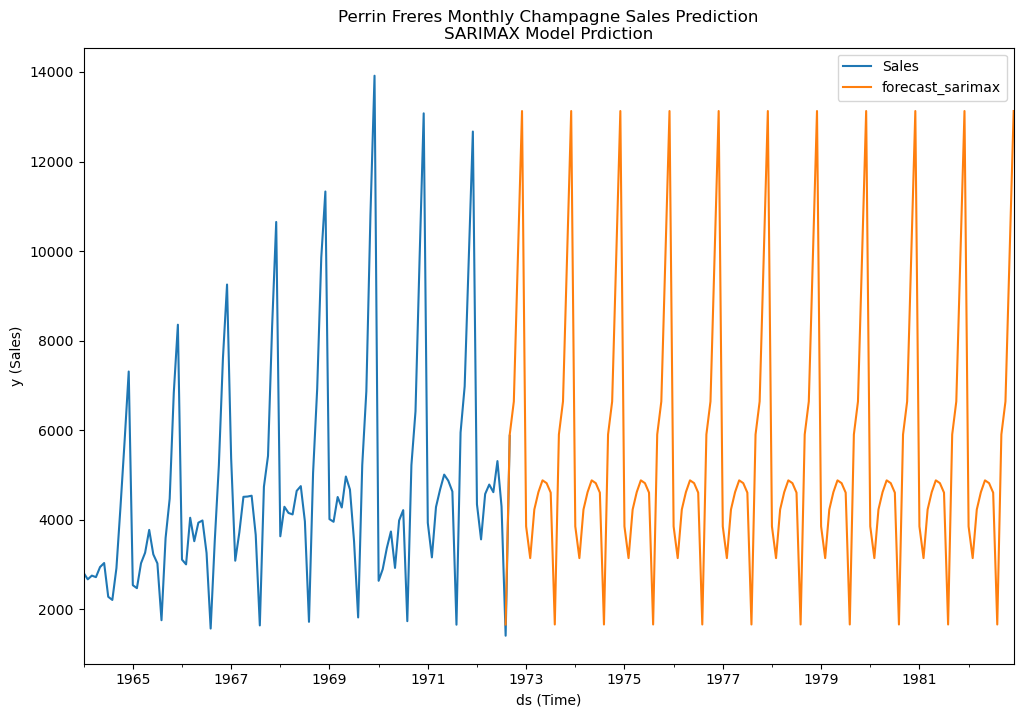

In [172]:
# Concatinating future_dates
future_df = pd.concat([y.to_frame(), test])
future_df.tail()

# Predictions 
future_df['forecast_sarimax'] = model.predict(start=y.index[-2], end=future_dates[-1]) 

# Plotting
future_df[['Sales', 'forecast_sarimax']].plot(figsize=(12, 8));

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nSARIMAX Model Prdiction')
plt.show()

# Prophet Model

- https://facebook.github.io/prophet/docs/non-daily_data.html#monthly-data

In [173]:
df = pd.read_csv(r'./perrin-freres-monthly-champagne-sales.csv') # parse_dates=['Month'], index_col='Month'

# prepare PROPHET expected column names, Cleaning up the data, Drop last 2 rows
df.columns = ['ds', 'y']
df.dropna(inplace=True)

# Convert Month into Datetime
df['ds'] = pd.to_datetime(df['ds'])

# Check the data type
display(df.dtypes)
df

ds    datetime64[ns]
y            float64
dtype: object

,ds,y
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [174]:
# Trained Prophet Model
m = Prophet(growth='linear', seasonality_mode='multiplicative', ).fit(df)
m.history_dates

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0     1964-01-01
1     1964-02-01
2     1964-03-01
3     1964-04-01
4     1964-05-01
         ...    
100   1972-05-01
101   1972-06-01
102   1972-07-01
103   1972-08-01
104   1972-09-01
Name: ds, Length: 105, dtype: datetime64[ns]

,ds
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
223,1982-08-01
224,1982-09-01
225,1982-10-01
226,1982-11-01


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1964-01-01,3149.817020,1623.445239,3004.140824,3149.817020,3149.817020,-0.259997,-0.259997,-0.259997,-0.259997,-0.259997,-0.259997,0.0,0.0,0.0,2330.873468
1,1964-02-01,3188.135504,1450.535949,2803.607727,3188.135504,3188.135504,-0.325480,-0.325480,-0.325480,-0.325480,-0.325480,-0.325480,0.0,0.0,0.0,2150.460710
2,1964-03-01,3223.981828,1817.157820,3220.126502,3223.981828,3223.981828,-0.215606,-0.215606,-0.215606,-0.215606,-0.215606,-0.215606,0.0,0.0,0.0,2528.871740
3,1964-04-01,3262.300312,1972.586767,3305.880577,3262.300312,3262.300312,-0.190719,-0.190719,-0.190719,-0.190719,-0.190719,-0.190719,0.0,0.0,0.0,2640.119260
4,1964-05-01,3299.382716,2129.630330,3512.193072,3299.382716,3299.382716,-0.153200,-0.153200,-0.153200,-0.153200,-0.153200,-0.153200,0.0,0.0,0.0,2793.918597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1982-08-01,7226.203155,1762.263838,3158.765016,6526.921850,7913.722465,-0.664673,-0.664673,-0.664673,-0.664673,-0.664673,-0.664673,0.0,0.0,0.0,2423.142021
224,1982-09-01,7237.781970,5983.674805,7925.861238,6534.680311,7934.164153,-0.042450,-0.042450,-0.042450,-0.042450,-0.042450,-0.042450,0.0,0.0,0.0,6930.539718
225,1982-10-01,7248.987274,7598.906605,9886.813209,6537.229656,7955.916502,0.206802,0.206802,0.206802,0.206802,0.206802,0.206802,0.0,0.0,0.0,8748.092405
226,1982-11-01,7260.566089,11429.143735,14359.912979,6535.749693,7978.238381,0.775958,0.775958,0.775958,0.775958,0.775958,0.775958,0.0,0.0,0.0,12894.461684


          ds         yhat   yhat_lower   yhat_upper
0 1964-01-01  2330.873468  1623.445239  3004.140824
1 1964-02-01  2150.460710  1450.535949  2803.607727
2 1964-03-01  2528.871740  1817.157820  3220.126502
3 1964-04-01  2640.119260  1972.586767  3305.880577
4 1964-05-01  2793.918597  2129.630330  3512.193072


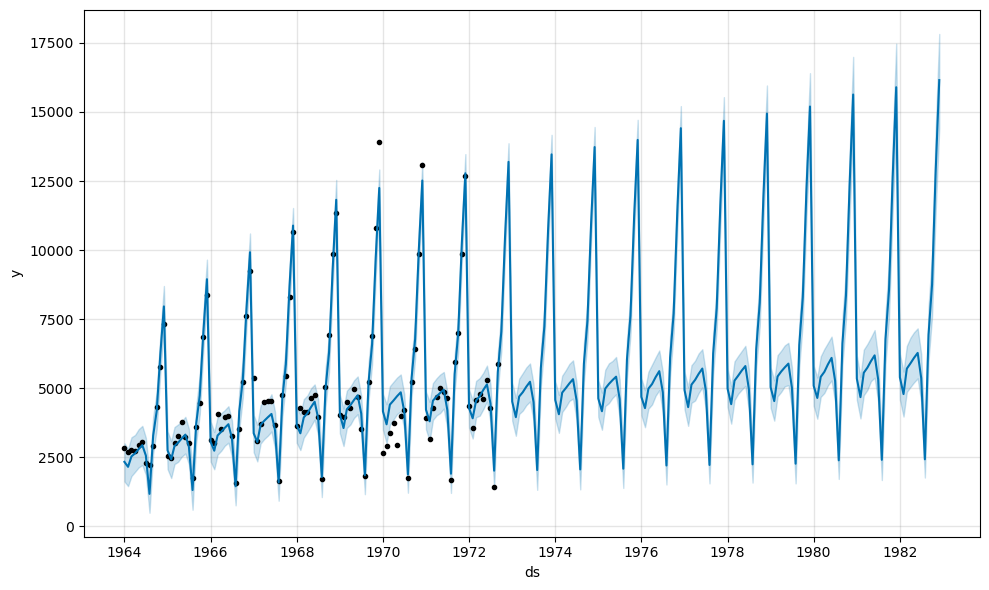

In [175]:
# make your future Datetime
# future = m.make_future_dataframe(periods=3650, freq='D')
future   = m.make_future_dataframe(periods=123, freq='MS')
display(future)

# make your forecasts
forecast = m.predict(future)
display(forecast)

# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

fig = m.plot(forecast)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


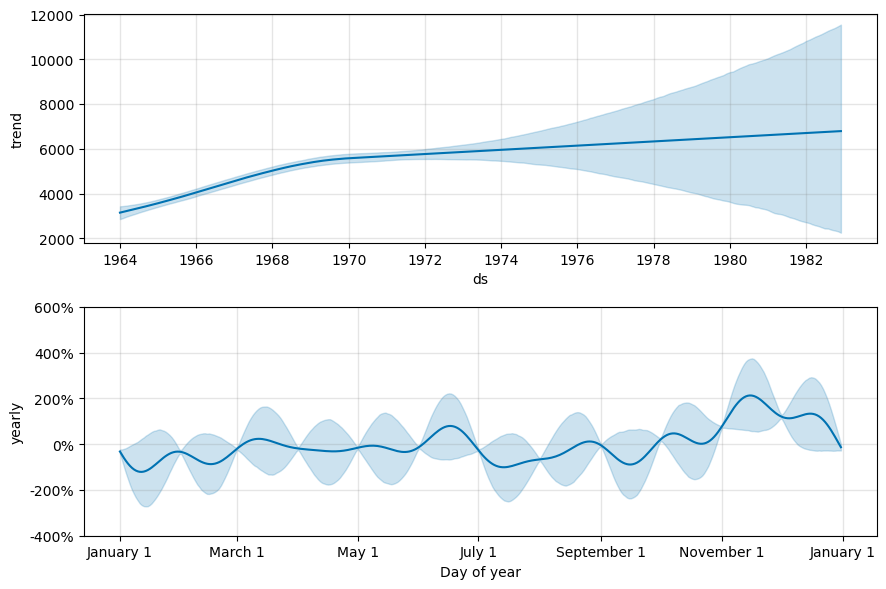

In [176]:
m        = Prophet(growth='linear', seasonality_mode='multiplicative', 
                   mcmc_samples=1000).fit(df, show_progress=False, show_console=False)
forecast = m.predict(future)
fig      = m.plot_components(forecast)

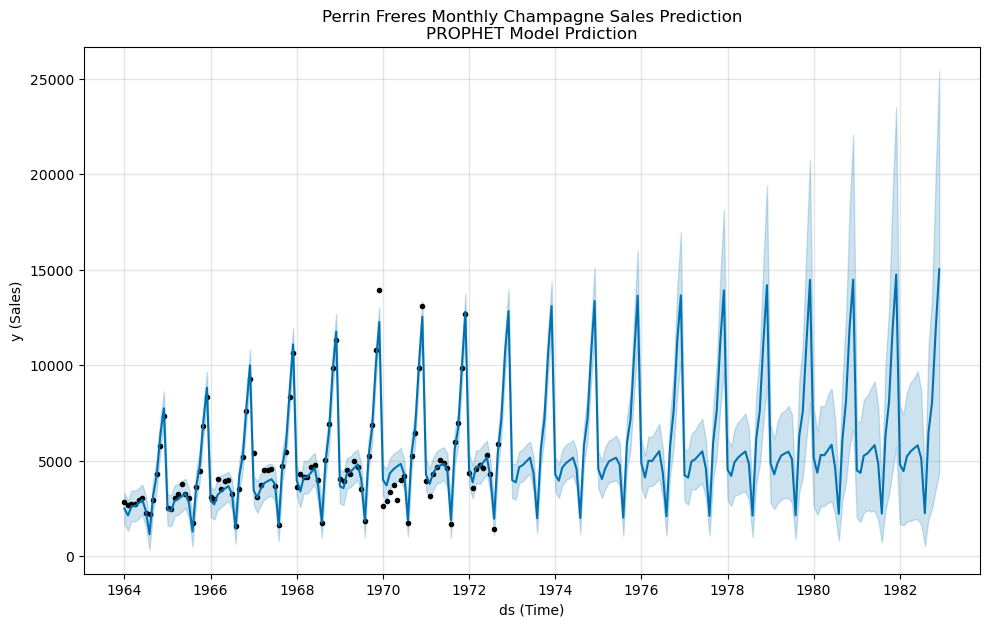

In [177]:
# make your forecasts
forecast = m.predict(future)
fig      = m.plot(forecast)

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nPROPHET Model Prdiction')
plt.show()

In [178]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from prophet.serialize import model_to_json, model_from_json


with open('model/model_prophet.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('model/model_prophet.json', 'rb') as fin:
    model_prophet = model_from_json(fin.read())  # Load model 

# Gradient Boosting - CatBoost

Unfortunately, the current version of skforecast is not compatible with CatBoost's built-in treatment of categorical features. The issue arises because CatBoost only accepts categorical features as integers, while skforecast converts input data to floats for faster computation using numpy arrays in the internal prediction process. To work around this limitation, it is necessary to apply either the one-hot encoding or label encoding strategy to the categorical features before using them with CatBoost.

- https://catboost.ai/en/docs/concepts/python-installation
- https://www.cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html#CatBoost

In [179]:
# Split train-validation-test
print(f"Dates data       : {y.index.min()} --- {y.index.max()}  (n={len(y)})\n")
print(f"Dates train      : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Dates validacion : {val.index.min()} --- {val.index.max()}  (n={len(val)})")
print(f"Dates test       : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

Dates data       : 1964-01-01 00:00:00 --- 1972-09-01 00:00:00  (n=105)

Dates train      : 1964-01-01 00:00:00 --- 1971-09-01 00:00:00  (n=93)
Dates validacion : 1971-10-01 00:00:00 --- 1972-09-01 00:00:00  (n=12)
Dates test       : 1972-10-01 00:00:00 --- 1982-12-01 00:00:00  (n=123)


In [180]:
# One hot encoding
one_hot_encoder = make_column_transformer(
                      (
                          OneHotEncoder(sparse_output=False, drop='if_binary'),
                          make_column_selector(dtype_exclude=np.number),
                      ),
                      remainder="passthrough",
                      verbose_feature_names_out=False,
                  ).set_output(transform="pandas")

forecaster = ForecasterAutoreg(
                 regressor        = CatBoostRegressor(
                                        random_state=101, 
                                        silent=True, 
                                        allow_writing_files=False
                                    ),
                 lags             = 48, # Placeholder, the value will be overwritten
                 transformer_exog = one_hot_encoder
             )

forecaster

ForecasterAutoreg 
Regressor: <catboost.core.CatBoostRegressor object at 0x7f50adb71430> 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
Transformer for y: None 
Transformer for exog: ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f50adb71f40>)],
                  verbose_feature_names_out=False) 
Window size: 48 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: None 
Training index type: None 
Training index frequency: None 
Regressor parameters: {'loss_function': 'RMSE', 'silent': True, 'allow_writing_files'

In [181]:
# Grid search of hyperparameters and lags - https://skforecast.org/0.4.3/notebooks/grid-search-forecaster.html
# Regressor hyperparameters
param_grid = {
    'n_estimators' : [100, 120],
    'max_depth'    : [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Lags used as predictors
lags_grid = [1, 12, 24, [1,3,4,6,9,12]]

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = y,                    # Train and validation data
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 36,
                   refit              = True,
                   metric             = 'mean_squared_error',
                   initial_train_size = len(train),
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False,
                   exog               = None,
               )
results_grid.head(2)

Number of models compared: 72.


lags grid:   0%|          | 0/4 [00:00<?, ?it/s]

params grid:   0%|          | 0/18 [00:00<?, ?it/s]

params grid:   0%|          | 0/18 [00:00<?, ?it/s]

params grid:   0%|          | 0/18 [00:00<?, ?it/s]

params grid:   0%|          | 0/18 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
  Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 154217.47846720126



,lags,params,mean_squared_error,learning_rate,max_depth,n_estimators
32,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",154217.478467,0.10,5.0,100.0
61,"[1, 3, 4, 6, 9, 12]","{'learning_rate': 0.05, 'max_depth': 4, 'n_est...",160960.879586,0.05,4.0,120.0


In [182]:
# Backtesting test data
metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = y,
                          steps              = 12,
                          refit              = False,
                          metric             = 'mean_squared_error',
                          initial_train_size = len(train),
                          fixed_train_size   = False,
                          verbose            = False,
                          exog               = None,
                      )

print(f"Backtest error: {metric:.2f}")
predictions.head(2)

  0%|          | 0/1 [00:00<?, ?it/s]

Backtest error: 154217.48


,pred
1971-10-01,6726.268780
1971-11-01,9873.002342


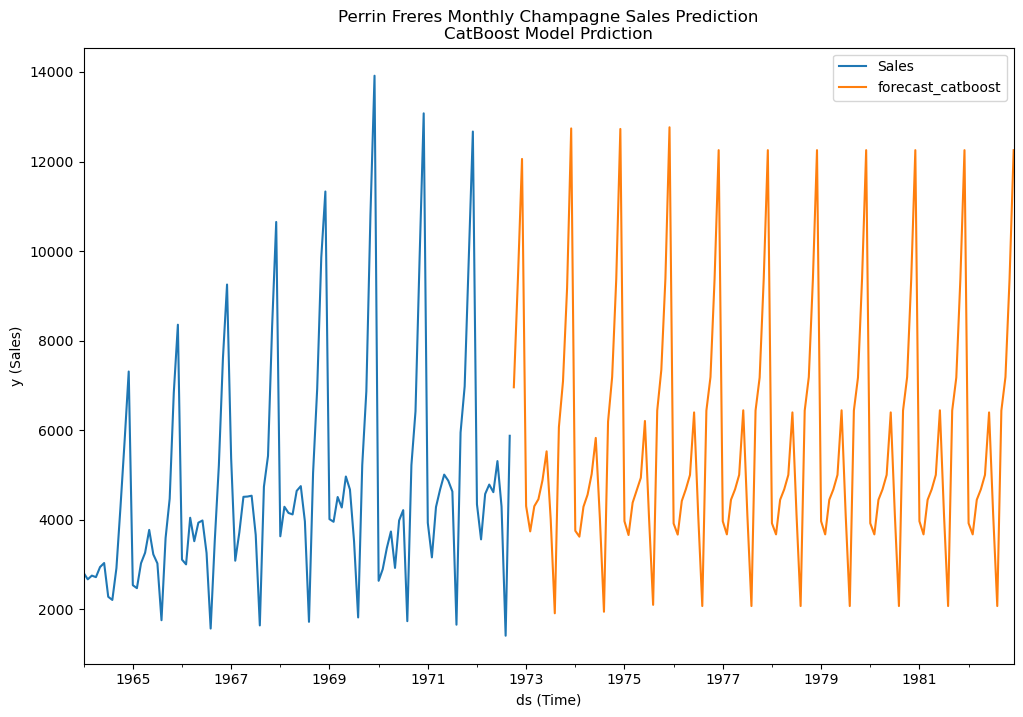

In [183]:
# Concatinating future_dates
future_df = pd.concat([y.to_frame(), test])
future_df.tail()

# Predictions 
future_df['forecast_catboost'] = forecaster.predict(len(test)) 

# Plotting
future_df[['Sales', 'forecast_catboost']].plot(figsize=(12, 8));

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\nCatBoost Model Prdiction')
plt.show()

In [184]:
# Save the model permanently and check
with open('model/model_catboost.pkl', 'wb') as f:
    pickle.dump(forecaster, f)

# Load the model
with open('model/model_catboost.pkl', 'rb') as f:
    model_catboost = pickle.load(f)

# Compare Models

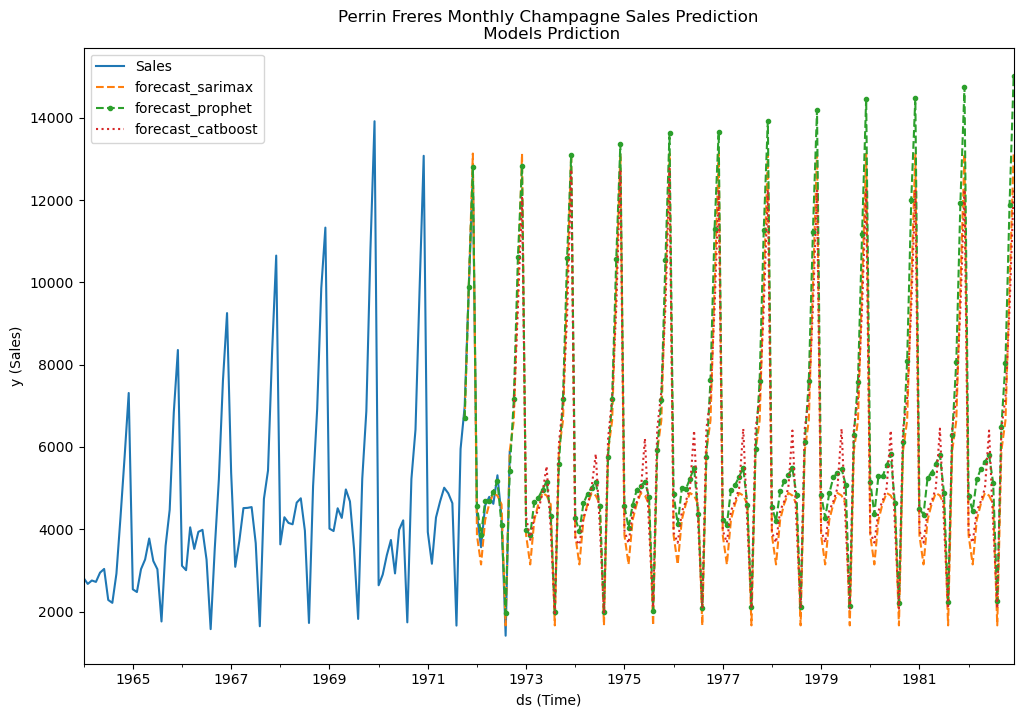

In [185]:
# Concatinating future_dates
future_df = pd.concat([y.to_frame(), test]).drop(columns='future_dates')
future_df.tail()

# Predictions 
future_df['forecast_sarimax']  = model_sarimax.predict(start=future_df.index[93], end=future_df.index[-1]) 
future_df['forecast_prophet']  = pd.DataFrame(data = model_prophet.predict(future_df.index[93:].rename('ds').to_frame())['yhat'].values,
                                              index= future_df.index[93:])
future_df['forecast_catboost'] = model_catboost.predict(len(future_df.index[93:]))

# Plotting

future_df.plot(figsize=(12, 8), style=['-', '--', '--.', ':'])

plt.xlabel('ds (Time)')
plt.ylabel('y (Sales)')
plt.title('Perrin Freres Monthly Champagne Sales Prediction\n Models Prdiction')
plt.show()

In [186]:
# get val data
val_df = future_df.iloc[93:105,]
val_df

,Sales,forecast_sarimax,forecast_prophet,forecast_catboost
1971-10-01,6981.0,6657.797019,6707.386332,NaN
1971-11-01,9851.0,9904.852721,9886.469571,NaN
1971-12-01,12670.0,13130.938903,12798.542656,NaN
1972-01-01,4348.0,3849.302525,4562.761684,NaN
1972-02-01,3564.0,3144.798891,3865.029793,NaN
1972-03-01,4577.0,4226.090435,4689.602423,NaN
1972-04-01,4788.0,4614.782365,4675.826161,NaN
1972-05-01,4618.0,4873.764602,4914.454291,NaN
1972-06-01,5312.0,4815.921731,5163.801167,NaN
1972-07-01,4298.0,4605.792162,4101.346363,NaN


In [187]:
# Backtesting test data
metric, predictions = backtesting_forecaster(
                          forecaster         = model_catboost,
                          y                  = y,
                          steps              = 12,
                          refit              = False,
                          metric             = 'mean_squared_error',
                          initial_train_size = len(train),
                          fixed_train_size   = False,
                          verbose            = False,
                          exog               = None,
                      )
val_df.loc[predictions.index, 'forecast_catboost'] = predictions.values
val_df

  0%|          | 0/1 [00:00<?, ?it/s]

,Sales,forecast_sarimax,forecast_prophet,forecast_catboost
1971-10-01,6981.0,6657.797019,6707.386332,6726.268780
1971-11-01,9851.0,9904.852721,9886.469571,9873.002342
1971-12-01,12670.0,13130.938903,12798.542656,12558.227367
1972-01-01,4348.0,3849.302525,4562.761684,3698.727007
1972-02-01,3564.0,3144.798891,3865.029793,3636.777423
1972-03-01,4577.0,4226.090435,4689.602423,4109.215958
1972-04-01,4788.0,4614.782365,4675.826161,4449.219507
1972-05-01,4618.0,4873.764602,4914.454291,4980.931152
1972-06-01,5312.0,4815.921731,5163.801167,4730.585187
1972-07-01,4298.0,4605.792162,4101.346363,4129.021810


In [188]:
val_df.apply(lambda x: mean_squared_error(val_df.iloc[:, 0],  x,  squared=False)).to_frame('RMSE').T

,Sales,forecast_sarimax,forecast_prophet,forecast_catboost
RMSE,0.0,337.566649,276.45664,392.705333


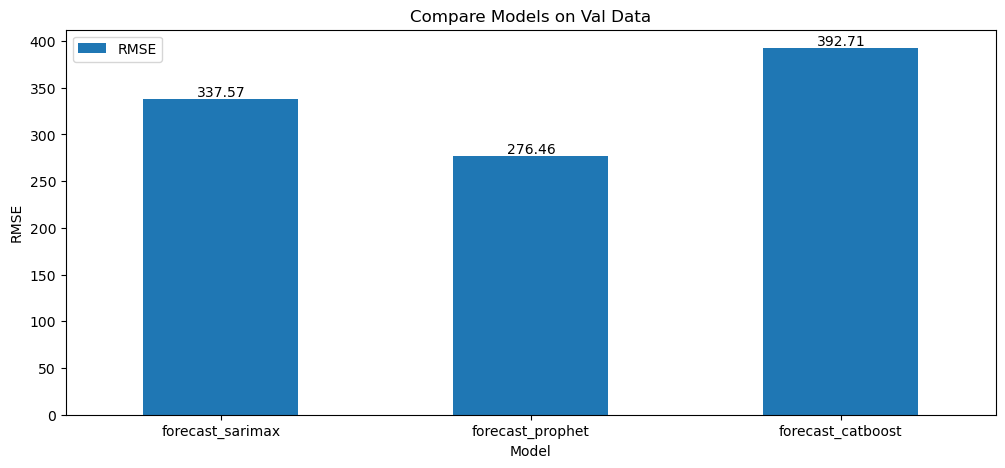

In [189]:
ax = val_df.iloc[:, 1:].apply(lambda x: mean_squared_error(val_df.iloc[:, 0],  x,  squared=False)).to_frame('RMSE').plot(
    kind='bar', figsize=(12,5), rot=0);

# Add data labels
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.title('Compare Models on Val Data')
plt.show()

# Download Models

In [190]:
from IPython.display import FileLink, FileLinks
os.makedirs('model', exist_ok=True)

file_sarimax  = FileLink('model/model_sarimax.pkl', result_html_prefix="Click here to download: ")
file_prophet  = FileLink('model/model_prophet.json', result_html_prefix="Click here to download: ")
file_catboost = FileLink('model/model_catboost.pkl', result_html_prefix="Click here to download: ")
display(file_sarimax, file_prophet, file_catboost)

/mnt/c/Users/clk/Jupyter_Notebook/perrin-freres-monthly-champagne-sales/model/model_sarimax.pkl

/mnt/c/Users/clk/Jupyter_Notebook/perrin-freres-monthly-champagne-sales/model/model_prophet.json

/mnt/c/Users/clk/Jupyter_Notebook/perrin-freres-monthly-champagne-sales/model/model_catboost.pkl

<p style="text-align:center; background-color: tomato; color: Jaguar; border-radius:10px; font-family:monospace; 
        line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
        <strong>The End of The Project</strong></p> 